In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os 
os.chdir('drive/My Drive/NST')

### **Imports**

In [0]:
import tensorflow as tf

In [0]:
import IPython.display as display
import matplotlib.pyplot as plt 
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,12)
mpl.rcParams['axes.grid'] = False

import numpy as np 
import PIL.Image
import time 
import functools

In [0]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3: 
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

### **Both images are uploaded from an URL link**

In [0]:
#define path for content and style images
content_path = tf.keras.utils.get_file('bdx.jpg', 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUSExMVFhUXGBgYGBcYFxUeGBgXFxgXFxcXGBgYHSggGB0mHRUXITEhJSkrLi4uFyAzODMtNygtLisBCgoKDg0OGhAQGy8lHSUtLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIALcBEwMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAEAAIDBQYBBwj/xABHEAACAQIEBAMECAIGCQQDAAABAhEAAwQSITEFIkFRE2FxBjKBkRQjQlKhscHwktEVM2KC4fEHFiRDU3KTwtJjg6KzNKOy/8QAGQEAAwEBAQAAAAAAAAAAAAAAAAECAwQF/8QAJxEAAgIBBQABAwUBAAAAAAAAAAECERIDEyExUfAiQbEycYGh4QT/2gAMAwEAAhEDEQA/ALy2KNtIa7asT0qztYYAV0tnHGIGi1OgqY2xTwtI0ohyU8JUgFSLTHQM9o1FlqwImuCyKAoCVKk8OilSn5KAAgld8GjQgrjUwK/6CCQe1F/RhG1SKakJosVAzWoqC9hQwoxjSFAFeuEK7VMlFGm+HTsKIQaWSnla4GoAb4VC4nhyPus0cppzsAKdg0mUuJ4csTG21VC4EXM9vVVMbVp7iM32TFB3rOTmymrjJmM9NMAwvsyijlB+Z+dXNqzlEdaKwF3MoMbj5VPctCdx86mUm+y4QjH9KAhcin+IIp72J1qIiKmyxG9FNZgd/wAKazVFSsDt7bTQVX33o4rNR3LIihMmSsz+NYmqPEq2oFaTGW6o8eG2AIJ610abOLVVGVvYkhiMrGPKlWgHArnl8hXK6M4nPhLw9KSzFPqRFipBZmvLPZBwKcBUrYU1ELDCqEOFdiuEx0rhxA9KYD1NSrcquF8E6SafbvHqKdCsNJpyiog01IgpDOtULP3qVjQl62WnpTQDDjBMTrT1xQNV13ho6Ez3qSxh8m53/OqpEJyvksPEpG5G9Vd7GkHYR60Hi+JEiAINNQbJlqxRohcFJ7oFZWximnU1t+G4ZcoYQTprSnHEcNTPoAk9qhxGFdlJRSSPl+NaW7hgTtrFMawcpWdKzUzRxKmygAqZbYPSuPbgwaclOwCUt1y5aDaUrbdKftrU2A9cMO1CXsLGoonxDTLlyhWAERpUFwUS5rnhCqAr2SmMtHXbNDNaoAGJpt0GKJuW650igRXjDzUL4Ydqt1sV36KOtFk4IBTDrArtWGlKlZWKDYIpwNT5Z2ptyyeoioTLGqak0qHIaeLZpiHGyDTHwQNdNyK6cRG9HIA4wYXYU5bANEK4YV21A00mnYiD6PUdy2elFOTTlbSnYFdmPWueItHXSOtBXLK7xVIREbw7aUPeuCJ3pz5ZI1HpUT2B0Jq0iWytvKCT0qBcNrqKtrOHWeYxVlhMHaZgIJq3PEy28jNW+HszZVEntWu4NYuKgDACNtfzq0s8PRPcUA1LkgVhPWy4NoaOPIlPek40qMtXRcrE1IWwgIqI2tNooxmqJxNNNiaBDh26RXHtOKJyt2rnN1qrFQIQ1RsDRd1aalgk6iKLADrs1YnCjtURwlGQUBtrTDbqyNoRFD+GAaLAENqo/Co1wKiZKdgDGo2eiWtioXUUARTXKdpSooRmfZ3/AEqIyhcRZKsOVmtkTI6m20R3gE77VtMH7S4fEaWbqsY9wyr/AMDQ34V8/YmyoGZGVm7TDDX3WnWYmCdpHTYe3jio5uXrBnTpswGs6TFRFxkN2j6UAcnb8RThh2NeC4T2xxFscuJvKB2YsIOshbsz8CBV3g/brF2XAGIFwXSSTdQEZo0gKSVBAPu6co0Eklu0CaPYDhTSOCG1ed2P9I2LESuEf0N5CfiQRRln/STdB5sGp80xNr8mijkLibkcO7GKdhsCA3f1rKWf9JFsxnw2JX0VHH/xafwqxse32DIJm6CNwbNwH8qTchrE09y2CIqOzZCLqZ86zd729wce9c/6bfrULe3uF6eMf/aP86VMpyRccSEgsAemv8u9Uzk1He9vcMY+rxBA7WjH4mobntphCZNnEH/2wP8AurWM6MpKwinWrWYxVa3tVhGIi1iVEwSbYIHno0n4VbWiDDIcynYjr++1aqSfRFHLmFKnXbvWj4ei5V2JAqDDYdioYj4dRRdkBTGkxMfrFY6k7VGsI0znE8alm011yAqjUkgbmBqfMihOA49cTh0uo0gjKTpOZDlJ0J3In41Ve3fH7Niw1q4VLuJW3KywDL0Ow8zpofShPYP2jw9yybKFEuK91/BBWVW5euOoAGhADAababVkky3JWaW9ZbvQd0ON6nu4qovpJq0SNS44704Yk1y9jAASSABqSdgKyz+2drMYsX2A2IVAD5gFgfnFMRrhijXPGrJf69Wv+BiPTLb/APOpLftxYG+HxX8Cf+dKgs1ivUouVkv9fcN/wMT/ANMf+VR/692P+Div+if0NFBZsfGprXqyR9urH/BxR8vBI/EkD8aFu+3jT9XgrpWD7720MiOxbTf8KKCzYs5qM1hL/t5ifs4fDprH1l12/wD4Udu9AYj2wx5WfGwyD/07RP8A9jfpRYrPR8poTEYhVIDOoJ2lgO3f1ryXF+0eKLZTjbjG4QGCgIuWI2U6ToNCN6r2awJCrIXbWSY3kKAp9CKMqHR6jxPj+HtEh7oLjdEl3+KpJHxis5xL29YA+DZCxPNdI2HUIh1+LCsdZxPinJbEHUBdBrGbRR0rq21VGbEOhgSVA1E7KoZjmbaToFpS1aHGFhz+21xjPjvr90KF+AymB8TSqgHtGq8qW7YQe6CJIHmTufOu1jlqfGb46fxf6HWUvsMha3chEc+IonmRngRoDC6aUy7w5CDJ8MFQNQGEEypzRyyVGpH+N/bVs5UwUSwsrtJ+jvoTG35a96Hu3AVcFWHLbkrqFAnJlBB766/CpIsz+J4O/MqEGFCjI/u5Y3mT02HU/Ch7mGYyoBVgwa2pkTJGbyGhbUnr89NfW25LMdSUMMp0gqYnWT2jvHWrLhFhQ5128Qe9pAKZQAdBvEf4U82gxTMgFuCQR15edSY82Ok9N6Wa6JORzEaAKRu2bmBOwgz516CmGDA5pziREWp94lTBETlj5069w61K6CGJn6uyRrEDaQJnvtT3ZC24nnxuvDaN8iZ7bSOlE4PiLLmJzEgFfdfWIiJGkyta1OETceLaZFyFc1tZcMsvBHnpoNJqXD8HW54dwoqnw7rERcH9W6jq06yI7Sd50e8w2kUGG4y4kFW5TCkByG0Ukjl7tHXaprvF7g1VS2qgjLcnmzazGwHlrNX9jh4NpLhsAM5AKZb2ZRLCSc0xoNwPeo0cGTNkyLGWZyXImW09+Nl79ancfg9temSbiZZZCvIje3ciSeoUajXanWuJXCeZH0ZoIt3IIBKhoIJWQZg1q04YuW4xT3C8ctzULmC7trOXp3+NSHhVsBCVHMygjK2mjEnUmNhvt509x+C216Y/EcQv+IAtosmxJVx94zm205RHnVl7C8fvWM64i1cFtn8TOwIKZvfAEHP0MDbXvVyLFrxMgtqw2kI0Tmg6T6DLM9dtKG9oOFp4LkKphmGqkcoBIgg+W+o8u5uyQbaPVLWnXSsD7c8bNjEl7MeIqKpMCSwYNlMMGKgOp1BXmitceIWLFtVu3dVRZJMsYABkKNW26da81a1cv3btxQUBvMVAKMzK95WBztIXQhuXQRuRpRNjSfRU3bzXLi3LuHW5cJXxGdBnOwkll7D00gdqZduZblwrhkRgPq7iooaSpkghRBgnQfGr3jNx8Ph7rkuuTlLlrBOZgqgk5J3dR603B41rmHs3ibhF4oitOHnMTlBB8ORqPI0bj8Ftr01XsZxdcVh0j+ttoi3VgiGy7iRBBidO8VeiySYivLb2OxGCxAuIDzOyOrFSSAFJ2gMeXy9R1v8AA+3jjKcQLLK+bmslgUHhtcWQzNGiGXmNfKrWpYnAqPbrjd+6jYezZ+rLauGXMQuwKzygtqJ15RVKt/FZ0GSQwWdUgFo3bPAidZ2jWtXwzhxWzKoGLOpjKGOUgEsSdWO0naTtVjc4aPFUBVKkGSbaQNCV/T5io3JFbcTDXMZeIYomuUnWNdQIjNqdRp69q5hcViMkuhkyBGXod8oYkDURPY1tLeCH1k215dV+rXm97bvsPnUN7CRYDi0heTK+EugGbWJ8h8+tG5LwW3H0x/j4sXchtcsCCIOpAMls0COYGn32xBUsls6dwesDQDVj6Vsv6KTxVTw7ZQqZfw135oBPwHrm6VCMAhF4+BalM+UeGOcCY+ZA27x50tx+D216Y2/fvm0SLZzEdoMHQsFJn9YoW/axIGVRy6wTctggSQAyl+WSJ+VbqxwpDlfw7YJtPK+H9oZdACe5GhE9Jqb6CQlohFzEp4ilbQyrrnOuo6dTFLckPbR54eFOwYM6Zs0B1clQoUgcqqWJJj0HbWm2+A3Cp5xm0gBbpmO5C6aT869LTCEXSoY+GLe4KA58xI90DXKO0Vy3hjF3M53c2znMKCCBOX+7uDFLckPCJ57a9nueW8XMy8oRDAEIpOZ20MhiTH2utWC8CRDAtWlJOf6y6WYEmINtOUiWAgj7Q71fXsLyLnZWPhYgG5mYqOYBTmgbBtTHQ9qNxFtBcddue0YC7ZXTQ77ymsaA+tTk2VikZ+1w4kFQcygibdu2bVvOwWM3VSc46SJqv45wx2sm2gspae6ltQqnxGPiustcJMzkmY6/CtlbiXhWk3RMnTMFtgRoOXRTBM71R8Vx7W8O11VQBLjkqQWBHi3mzaZeYlW8hOs0IDKJ7E4G6BcTEsqsAQpZZGgn7PelXnZteR+RP412tMJ+j3Ief2b2xcvB7QF5D41vmhwTcChhylhPutHwrmFxt3I/KH5EZipBiG0Eg6cgnUTv0NC4dh41s/dtoBHkbnaq/Dj6vFTAzKkRIEEqCBOpGhG5600Ys07cSaWY2m/3TkA6wDblQpA2ht9DlPej8FjFIvcmqreEELqXIywD72u896pOL2lW2GDGbhtWyZ0Ko6LA7bn5nvVv7OXz/tLC5HMygk7ZjbURJEGE+YFJjQY+Jttgxkt6liIGXLOZmneNo17mN6KxGKtm/h2yHIQ3NB0BByjRo1M9JGm0im3bKfRBaW80FsubOkxmlhnmBodvIVZWOGtd8G6HeLYJgZYJYbsJ5+Xr1k70ufyNV+AcYu1nxAZmBEkavAyhs5XWPeI93fTenWcVb8HOT/u7wJ5pz+JbKAk8xPu/PpGg+H4xa8fG/XXJtqxYBeW2toQSo6aknz3nWn4PiNk4MXQ7NbC3V8Rl5hL2xIBmSC1SxoJwOKsGzbN12VpYzL5iQYYEiSRATfy7UUL9vx8gn3VHvHLmGdoI9ycoQz5jtFV9vHWmsWHW5cZcxYOq6sLfKQ3cSd+vnVquKX6UZuMCFy5IGSAouE67GJoGA+On0bEm2WzfXZOZp5i/hZTMqDp7sR5UbxO6gNjw3MF8xJa5LIquGkgyxzEaNvPWguG8YtXEv2kvXHYkMQYDKtw5SVJOg67j8a5j8YpXDXFdmCaMSBMRlLGfePLJ7D1ql+xIrOMi4zhWKGC6A6B+YN5AxkPmamv3R4N8tm0uPElpCkuF0YmDMaDaq3EXUSVzK6M0KNCDvcMjfb8vSnYG6tyxiLdtrlwlwwJBLQ4GUgmeqkfChggD2ox9y6HN26Sua2pQEqjLOaDMs4knSQuu1WnsjiGZgJGUKmVVHQNbUNO50jy1rzTi+KuZWcWyR4kEkkiVVdyNuo9VrYew1zNcEnQMggGFAz2+2kbipadclWaTjmC+kWMVbuM2UFShIUbMpmSBOojedY6wWcCseBgsLbST9YwcgAwDcYu5gECO86d6qfafADOptXMRL3+dV8UBLeXmyg/2iCI0gGKrOFXrFm4Rib95Cl9WtlvEOeyHVYcTMtIOo7jXpYlFvouvbrEi3dtszhQHue8NCcuhPUCPzrNcRxwDYQSGX6KIAIzAeAzMPQlSPgau/brCDEXVRQS4uBlQwoMJJksYVSBM/hrXn3F7l+7iEseEfEtp4KqinPAWCpgmTBPzojET7PZsW4GHVbatOYadQMmp3B3jWj795fpNqFbLA17SrgSJ6cs9uu1V+HuW7dgi4zL7hYhlBnKp1JjrNWF66GuWbn1mwywy5CLgHvdT02qVdFMAtYu2GxCwwJBCT9oqGMLrJ6HpXLOLT6EjMjMZKlVy7kneWiII17+hqp4Xei6jszZuYnedFM6k9quLuNstaKSygsQArLmMKjtEmCIdZ9RVONEKSYRdxaDE29DBCx2k5wJk6H3JnbrQQxiZMUozZgLuXUydXy5ebT7Gx/LSyv3l8Wy0PqFjmAWLhA5hOp186is31DYj+smMx5l+zC8kbHXrUUyrRBhsbba0CssRbuBo1bOTbG05jqR+5qHE4geDZGRi2cmI1hTc1MnTdd+9FcMtLdteGof3HtgswzifC2PlmobieJt20sWQ912s3UVvDZCwZAARek9rgOmvpQk7BtUSjEL9NMJ/u4zwMpMudG3jUfGlhsSAl9habWdMnMczPpAGsZlJpljiuHbiJtpcuNeNqAoKG0V1cMIMkwYnb86ZwHE2XN/Dhrqted2UXCgYhgobw4YyBM6idRM0Ux2rFjcXOHhLbZiLqKNQ31jrDDTbmHnp6S3F3Lr3ARbIBxKEEz7lsKZAMGSFJymIjyrnHcB4OCKFifDW5kYkzy3UK6jqMo2HSpOB4O3cv4swT4eK8ReYiG8CwZ0j7x013op2HSILOKuxmIRc9y4SSQFVrduFAZtyGtMWHQKfKqdrYxRFgXUZPDbPb2l3zkkGAQMzZgNdFI70hgM9u/bSAfpWKyiY2t2mIkjlkSNO9UXDeD3bGLssbiMdHmNANcy5SNX1Os9T6Uui0kzzAPGhmlVv7Y4FbWNvpbjJnlRoIDgPljpGaPhSrpTMWkmaPCFAbYYuSoliFUZlObKBJMMNddZ00plm9ahyJKoqjK1tSdWzSTmhpLTUlq0RctGIlNdjGWZnb71A2bQVL65gM6KQIOkEb6nqI1PWs0IvuKC14VqfE0cachGrqAdxv8dTNG8BUMtxQYCsS6wFzEFcpkMYhtdpMgVQ4nEh1K5zAW2ygDWZUz5gyunnVrwq8FF8wSOYkaiYyEkbzBUnSiQL7l1awd1bQDsDN2RyMCJaIJnry/yM1c4A3AoyXMim0VhlJl+UBgARrAjXse9ZZsaxwYzBw2b35nUEkNBG0gr6ii7uMPiYdct0GG5Q2jADUMMu4ME+TUrYKKGHAu740FLhYrcQsIVX1DELBnX3hJ20NTYPh4GC8MWXVJb6gkeIR4lokeJOxMHyg+VT28SfFxBW2xkajPyyFMZARpmGs+XnT8PiWFgDLPJe95jJAZAWzDYiD/D51LbKSRBwbBNZshPBuFM1wW0zglFK2p3Y6FlJ2HUkaybLG4S5cvqVDct3MWBhQfozKDuIPMoG+p26iDDm5cs2sltoBzf1hBaOXUnfNBPlpRwxJGJ1QjkH22yxqM2TvKkemtPJhSKvgWAa3ev3GtOpfw2a69xTMMIC5fdy9B1Cini29qxldSM2YKkzBdmyEFTvOm+nlRYxEYfElkaAbhJzyRknNlJ2CxI707iSMDhgUjISCM2s5CVknfRSaakwZUcRwTLcB8FFlLiNFwmCwXKxUmfvdOp26zrbJs3wLZw8LklW1DMGgrH3c0/3utMS+Idj7+hEyQRmYqSJ06j4T1iiTaK4bEqJM3DqZBJnVfKIJpuyUYvF8SsC0udL2ZSVKq6c5KJLOfD76iD1JmtDwbErfY2lthQbYtByyk5mYKLhhQc3PMx0ql4lgxzFXEZ0GkEGR3mdNoNXPshaHiBgxkZSY6kXLeh300qXK0UuCw9rbYUAeF73iW1KxHiXLcAEGZ0YRJGx0gVT4knEXFCYa5ntgWRcVgMj62iOZSp1uyYP2ARtVlxfg73Wvu2IK+HcDxlkAnlGU9IUx8ag4PwdraWb3jsQ+IDEQOZ1JCljpPumfWmlQ8vSXiVoWr91GGVHARbhcgq5F4lgWJYkm4BvEARuaxmK4phkuuiWnBIKre8VmKzAFwI6A7ecwTWp/wBIltmuLlcKfEMzOXkVR01NZ3jGGzmwpME4dScu+ttmnz10+B+FRkSzatwxilxrNoNOdgA+p8S2sEG4PIGJMEDcaAvEcJvXCyOSBca2VIYcn1SIR75kCD3kyZ2rq3MmGg5hrsDzABQesgiB2qzxVw/SrAKnNB2IgSCTPcrkPrUKTHJJmWNrxcqompdCec+6HVmBzaQVBHxoriPs0byKrW2UKSOW7DLyIAVmQZ2Oo/q13nTuCwTW7rlVJWyTOYgSMrREenwo27fe7gs2RmzN0IzAAkZux1BERVufVERj6d4Lwe5hwtvnYF0IZ3zFQGWOvSNvKld4fda6SqgAZ85ztzhkYAQWgSSO0RRWKv3DiLIyaganOIEhpB01Ig+tCJibgbFP4a5QGkS3NkzbQ2khT6ad9Ic32WoroN4NaupsfCGpKxn0+q1nMT26/ZqsxuBxK2sPJDmLaGDPNyDMzXGBYkiJ7KNqmwK3BZVSFym1cgDNJEoSS2bffpTcVd+ow4yNCXBHNqTbzgSes5CaWbsHFNUR2eDXl4hcu5VEooW+uyZVYOFs54gghdZiJEVzh2CxTB1DLay3bTFoGeFNslQVdtIkkbNoNiYMW+Rji2VjNuBry5ef7MTMqaiwF0rbxK5XlmZiJk6lkIXTpkNGbBxVlf7Q8Fyi7ixiC51fK6syAWmg24LSVYtJBmYjbSrH2Xw97PjENwK637mZgGbPmFtwSCR9lraxrASARNAYoRgxbZbmQBwwBOdlz2y7e7to3prTlxYS87BnBfGDNtDDItsIO6khTPb4UZejrwiwl261xzmtqFfEW2yIwJdbdpzdjNGYgQT699MN7X+0ouP4CaqpgtLCI0CiTJ9WM6VteHiCDmeWxF9yYXUPaIyiG3UBTPk3lXnntTxKzduIBLFQFci2q8w0bI0yQTrJ9JIOjg+RvorruFxF4+J4Vy7OgeM0hRlHN1gCPhSrX8K4lhktKqNdVRMB7rBhzE6hRHypVrZlbArGBt5yNTkQFSIGuR21AHf8qbaVEDCAYCxOpEmSNfOobd8BgTIPhgGdiPDYfn+dcGL0IXsu32fva9KgA76TqYXqrfKD09KsMBcY5hyiVujXsxE71m72M1OojQ6k9DOwmicFjHBnK5EHULA5iJ3Ex0oaGjTrcZrJtsylZ3A0jOTG/wCvSiLrHxLTncZhpuCYmTqdiNIrMtxN10CuV9T1OYmVWZplzjT75GETH9b10/SlTDg1i4xS14ZnE5JkAjVDAXTWAetPwd3MiySJt3/s9BcUnUCNdfnWJPE2Bz5eaQTOf7Og1nWPOp0xl0kMByrIBCKANZMDXN8POjFjtGvwmJixbZWcAkwMyA+82khcp90mAPtdxR5vxc1Le7vHQFukTrB1nrWHTij7DUDsiRO4333+GtPPG2GrAZtBsp3PTX960sWGSNel8m1fHMQfF10AM5i2/cT3ot+ZbecseYCAIjlbWZkxEad6xf8ATjgE5YDamQupb3ida4nHm2iQraaCAV7QflFPFhaNMhVbrBgwOfSAIgMQqxIk7n41NxnEqlm6VkcxJnqdSW1nz371lm9oobmUZpEcoidYJ+R6VG3E2xQa1aUlmM6ruzED0n1PSliwtHrnGfZBbyE2VsKWUNraUAtII6EjSdSDuKwvCb9u1cuqYz27nhvlUAylxFJKrMaiYr1DChsqpmJIAEk6mB17mvJfbjCnDYu7nE528YGYOV3DfZ2hg66ydAetXKIlIL9pcXOHxHhC4GYoZCsJUFSZYyIjNv8AdjSh+C4xkwmHttmZ1u5m5GgIWJ0jTQdaqW4yrp4ZDENKqS5zEMMupB1p17i+T6vKQFVZlyToImQd6mpeDtBXtZj1e6pUT9Y8BoBIZVgAN12qHD4C5f8ACFoK9wW2SVQQMtpjqRuwJQZQY5hrrWg9h+DZmOLxFpSGVTaU6nWCXYEmIyiJ3megrc27qDZQB5QDr6VagS5IyNm4hwyi54hAaCFic2WNyYEQR3oq9cy3k1djGgIPRWkSdTpm0jrqaxuPvPhC63EYqbhh2QkGNVlpysSBM6nQzFD/AOsvOpJWSND4cgBgM0y0jzidutZ4tfYq0bHD4hS13mcEgZgQJMZpygHp5996iuYlVwgYF8vOFAyZtWfucn+dZFvaLQyo7nkX00ht9T22p9jj4ZYCmNj9WpiNZ1Jny85NPF+BkvTbPdX6Tbl2zQSCJiAGnlmTsfnQqXl/2gSxC5swk82re7J5ZAb+Ksu/FbiwFBZT9tbVqBO+Yb/OJpv9PXt2V9Nh4Sa/H7PrBqcGPJWa7DYhSq6mDbukcw2BWY33jvTb9xDZtks+UuMsBZklxrmMEe9trqKxbcZuf1hVyQCMvhJGpHXQRAPT85p7caIgEEkQY8EaZdtVMHQ6R+FGLHkjbFgMRJds2TRcq5YBuA67zqafYcfWw075pUjLzudNOb7Y07CsXb4sZ2B+znyXlMElozbgTNOT2gVAxYBMxJbM7rmntmHNq0x5zSxY7Vmiv40G2Ezqyst/nyso1JzSp1AGvy9Kfiy5cgc3PZeAQTyFRr8AT8Ky1niWcDwwcuVxyujHnmTqBrrNFXOJKx94AkJOdCNUcMNZIO3zop2Fqi+OjPyxmuWyNvdK2laANhyNPxrE+1fD7b5WsoTdL3ZgkSFuMACDoIGXXTernGY9mtXkBnPEZXB+zbBXoY0aNPkTWXwviC8huO0Ky6lgWEmIAJ2PXTrTjaB0AXeCqpi5etq8AlZmJAIEjTYjalQ3tKni4q86AlS5AJKicvKTHaQYrtbJP0n6R2wkhj2JaNtNh8dxTDePTt001/ypWLb3WyorOTsFBLHXoo1itHgPYnEsJdRaH9vf4Ksn5kU1AycqMy8nyMD5/GiTZYwOrHYDtr/Ktxh/ZTB2zF69fLxORAoLeigM8fH40bgvZexJPhgKTytfZncLOqi2jBf7zMTqJXSrxJyMPhuH3HOVQWO5HX4gbU9cOinnvCfu2yXPxKnJ8QW9K9ZwfC8IihcgcCNHC5BGxFtQLYPmFmrbDm2h5FVR2UAflRQHkFlLhH+z2r0/eFu67eRDFQAfNVB86Kw/sxjWlvo98z97KCfM5mmvXjjE7/On4fFgtAI9KKD+TyQ+zuLEA4W78l/PNApjcDxI1+iXf4BP4TXtF5RULWgVzLB0kRSHR40/BsTt9Ev/APTMH10pf0Nidhg7/oLTfy0r07imOKJJWCCIPTfr2rP3+O3CZzR/yyK1jpORhqa0YcMx78MvhhODvgnQZrZXf+00AbjUn1itf7M4AYRWXlLu2ZoMj+yoPUCT8zQdziBJ1JPmTUuExi5hmMCtVo1yYP8A6MnSN3hcXbZASvN2I2+dC4nhKXb63m2VQAgEDMGJzEgww6QRVFe42qmE1850rScLclQ0zI+FYzhXLOrT1FLhGG9svZ29Zm/h2m0olkbOWWNeUg8w9dR3PQP2W4HicSDduP4dkyIXxA7FSykDM0JBG8H4bj0v2hDnCXvCXNcyHKIJnygb6TpVR7I4m6+Gz31CO9y68CQMty4zgw2oEsY30jU1maUdsYTwkVFGiqFHeFAGvnpXCzeVG38Sg3NVeI4moPKJq0iHRDxrhvj2WtlspMQw3BGx0/etefYjDX7bFPBukrpy6gxsQVOvevRv6Tn7NQ+IxMxRj6LLw89fD4kj/wDHvtPTKSfiASR8RT04ViiNMHd+WvyOtejLdbtT0dhSxHkedpwHG6EYS4P7yA/idPSpLfAcSTD4RwO6vaB+WcA/h616Ql5utSAUqHZ5de4NcAKkENB5SDMdzIGk9Rp51W3MCVADBhudVbXeCJ06GvYbtgMIZQQDIkbEbEdj50Bd4ZBlQrjs/vdNRcgnp9oEnuKKGeQXcJ0ntIg6/A77/CmCxA94g9hpXq74Kw5hki5vlYID6rykHbdZ9aDxPs5ZYzl166iDHkACD55qMQyPLXkMJMzpuZiPh2qVcRdXN9Yx7iZBidIJIgzW4b2LtBiSwO0CX08xDT8DP6VUv7KXUIlrTfBjp3Onp+NLBseaRn7WOlhmRVOYQyKFIHWADqflRCY4ssuLTiCQWADaEyuZZgiNKL4h7Puk5SGiNvyAJ/XrVPctlAQQfn0Mj97VMtOio6if3M3FKpSv7ilTKPYeFcVS0gTDWVZdgygJbMDcvE3PVQ1EYjFPcH1twgfctkoPiwOc+oYelZ1p6Xr3lzD9Vrnhsf8Af3f/ANf6pXRgcjmaXD3rdv3LaoJ1yjcnqe58zU/0pT/jWas2HB/r7h8iLUfggqxUtpMfGqohssmunprXWS4RoxHzoFIPQfjUvhp5/M0AFWV0l2n0NT4JcpzoxHadapbiINdZ/wCalYZOvzDGnQujU3uLsQRTcDjWRYWI7Vn3uLGhPzNRtiVA1cj4ilhwVm7sueJYguDJ33/OqS9aTp+NQXceuoB/fwNA3MWT0X4g/pWkYtGU2pPke0gkSI9aY9wDc/Iiq29iH/sn+6f1NMfEsBMp8AP5Vsm/DFwj6WuFuZj7wB861nBeMFQql1yjrtp6k15oce3fX0FdGNY/bYDTaOh061M45cUVp/Q7TPeLePAWZEHqCD29aFVk8MBSeUBRPYaDX0ivI+G4u476Yl1j7TFB3gavJ6962nC7ugm+HIOsOPXaTXLLSo7Fq2Xl6yDUZwaH/CmgkjaR6/4U8LAO349agrhnbdpF6fOf1rpcDYflUBsqQTJ/H+dAs69Onf8AzppWK6Lb6WOgqJsQPKq1XHcfKf18q4+I7Ov8J/nRiLIsbmKA2qW1xAaSKobmNI2K/wANQPxA9WHyH8qeAZmsOOWozxJRvWUfHeZ/D+VN+mH9xRthuGpvPbdYYAjfWCP8Kq7jMp+rfMPuudfg5k/xT6iql7s/aYekVEf+d/n/ACp4Ccyybio91gVf7rR8YjRv7pNQ3cep7fvzoDE4dHBVi5B/9R/noaqLuFZCTbuF1+47t/8AFwfwIPqKaVCtMuMReB/Z/lP4VWcVuKbZGVWOmkNJmFMEQy/DttUNnFWyYOdH+67NPwMww9JpmOQMrDMV/tblY1nX0qu0JJJmaXh5AjIf4ZpUG126TIfMO8DXz1E/OlXH9J23I1q4oURaxIPpVCt2pUxUCP5V3HCaD6RFOfiJHb4kD86zj4o9x8z+lRFtZn8v86dEl9f4ofvAemtBXuJsdi0/AfzoAPT/ABew/CqVCHWOKNJDST5z+sUQvFz0qpdzNSWUMbE6/uKrgVF2mNJ1P51KbuYa1Vh6ltXKQUGFgNq59M6TQzvQd9/3/nTFQc2LXeRQ17Eg/Hzqpu3P3+wZrtpzI3+P+VNSVg48HcRd1NCm6aOayDr+lR4mwI0H50pJsqNIEN0k16F7H4bLaDNudT+m1YBLHp+/jWm4RxA2yA05dNgT+AqUm0xyq1R6at8KB+dRPxBdQWHqdNYrK4vji6AC5tEFHA1/vD8q5huJqysD2O5SPKQXP7FZbZWZPi+JsGhLhI8iYqFMa50n49fnVMcTmM6D02qew5/c1piRZbi7rr+tEFwen4UJgzuZ12p5uxux+H+FS0MIKjtFQ3rVGM5gED5lv5+tQYi+dRE/Afy86QytZoNTh5ig79+ZoW5iCOsVVCLTFXgNNKr7mNHeg7uKPUk/vzoV7/70ppDLVsZpUS4wmqu5f6fp/jSW9pQBaXMtwQwBHnrVfeV0BCMbiQeVt47Lc3B9ZqEYik2MMRUuNlJ0UTWEBjOy+RQyPWND8KVaS3f0EAfOlWOya73z4imR6cTSpVojNnQ1PD1ylVEjw1PBNKlTsR1F1qdV/ev60qVAHJ86mB6zSpUxHS01EyUqVFiIRhl7fialGHUdB+/M0qVMBFB2pZfKu0qLAcDTia5SpiIm+NRF+mRW9Z/mKVKmARhrkaRAok4gia5SpATYTiv9n8a7jeLQs5IPop/7qVKhjXZNwziudfeLToeRRqPjU9+5OpJ+Qn9/GlSpA+wTONdaEvXKVKgARnphalSpFHJpMa7SpDA7r0LcxBpUqUnSKiuTq47TrSpUqzzZpgj/2Q==')

style_path = tf.keras.utils.get_file('vann.jpg', 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAwICRYVExgWFRYZGBgaHSUfHRsbHSAjIyAiIiAjIiUiIyAnKDYtIiUzJyUgL0IuMzg7Pj8+IitFS0U9SjY9PjsBDA0NEhASIhQUIz0vJy89PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09PT09Pf/AABEIASwBxgMBEQACEQEDEQH/xAAbAAACAwEBAQAAAAAAAAAAAAADBAECBQAGB//EAD4QAAECAwUFBwMDAwQCAwEBAAECEQADIQQSMUFRImFxgZEFE6GxwdHwMkLhUmLxBiNyFBWCkjNTQ6LS8rL/xAAaAQADAQEBAQAAAAAAAAAAAAABAgMABAUG/8QAMhEAAgICAgEDBAIBBAEFAQEAAAECESExAxJBIlFhBBMycYGRQhShsfAjYsHR4fEzUv/aAAwDAQACEQMRAD8AwVr2QZkvHB+Arhvj0VT0zmaoSXaJScAUPiW3+MJKvI6sKJwAZSkqc1vEs4fpjFuNxq0LKwtnkJJBVROfdl1cWOI3RSU/bfyKNGaQBLQtCyk3kLqCEk/QxZq/bXdEEndsZpD57RCEgLAN7/1l2O9JYp4Qri26Fo6yLUtBUFbNfsYn/kSB4mNJJKqMkK2e192q7MAlBQJvAF868chxeCuPs+yyN4Macm+XSgDcD+Y6ukvcFhULpQSknPB8NYVVd5ZmKW9TJA1q/COL6ubdRK8UfIpZWFWJBxbGJcE+sxpq0Oo7t8G41j1OzaIUSlaHZyAc7qfKFt3RqZMxKc1BQ/wHvB6WjWFkWIGqJwHFJ/8A1COEkbsTMsktKtteOafhgJyTNYxKkSQCyisbxUeHlBx7mtl12J2JmLfK8X6ZwU60C/cTmzFS1uhTn9WfUF/4huvZUwoWM2YpTgnftGvV4VxemNaCImrT9JI+cIfpFqmCx2ydqqSSlYN0jEP/ABHNzcSkza0TM7VLtedP+LH+feJx+lgna2Hs2KzbWpVMBkx8znSHjxdTWDSxNfQR0RpaQjGe/ZJF5R02qdNIKVmoEkKUHKSRheUWHLWE7TTpDUgyEJDFMsrb7qpS/OHcLzJi37ALTa63WQmrumpB1fOJycViIyT2yJRSUskqJxJINTmY0XJ+Auhvs8AKuqBJVRzkD8HjCzUtNg/R6VJDgOA4D+NI5ZrFL4MiyaFmZL/PnCPM5kpJ0s6KxwReDsTV8Mxyjk5OBtX5RaMypYVpjry50jo44yku1YWiboXmqV3iQlwLw4FwzbmDGOuL/wDGm9on5Mu3pu3aEEElJ1dRfxrTfHpcXKpqibTFlWrYJAqFVY8KtDytASsUSSZgCnd6+npGTH0GtSXCnwCaDyfcY0qaaAnQJEm6i9yD+Pz2hVGlZts0Oz7KyrygdjI64V4Vh+tUK5BZ5UUqJO0pYShqYVJhs06AghlgAJRozgPUsaeHhC3i2byF7LsiEzaj6E3lnhlzL9DzjzeFHyG8WadgSaqZnJJO9ROGZr4Ry8sVryOng0F4NiX8sf5jltrQaBypF8h3u6/qOfL8YxCfJ0wtlFHsaCJFGy0945ezKUihWQ10kvpQciIyTY1oIFUYt1JPiIPVgshRSRXxaDHsnaA2vIrPlXaXiHFC1AxzYMOmBMdKbfgSqCzZbpAJBxyBG8FJy4eGbJNO0C/cRVZAkqMvZpgOD0+NHauVyh1nlEWqdo0LFNKkV+oUPSOLlgoy9Oju43aPDTgtCttQIfBknLVsI9hVJUkcViHasomYVKABObpr0o+EaDjoORFKinCu4xVenQNj0qU6QpFK1cUAfNudYK9WsMGgoQlVD9W/y4Q+aFONnKTmActICneGY4hSSCFFxhhThFErWQFFy1qLkknVR9YR/A1kKlpGIDjMK9M4Pr8MyJWn7gpB3s2TQsZLVMLELeTmcst9I4Pqa7qi3H+JWyoN5IBaj5cMOvWF+nV8iNP8RoSCA5VTJ2j0JfBEhMsg0uvofYw3jILLOBikPBjbeLMcsJLbA5FQhpRTXqZkcESQcF8L2EKuP2YbYZEtR+lIGjmrdY0u3kBIUQQCVA4MxpBWHlIzIXLT+kE8xDOT1QpMqWArZZzgCMPGJNPbCcuYSQVEDipvPOKdlFGSspeAwaud4Qe8X5NTJSo5sRBteDUQUgjIE4MmJynK6oICWFE0b/rA7NmwMypYxWsPoRTyrAd7ph2NLtZUH71gzfTnuzaFcpaSAkjLWtSvqUTxJPhDdPMmMsaB3gCwFYp6I6MM2UnNTDR4i5PQBqyTO7U7Ejr/ABAfGmsGv3NaVakzAQCSACVIKS54Zvw9Yk4TjbqwYHb7DFwKP76GORRUm3JfyNZQWkEszqODtX4YjLhvMtL5GvwDTalKINwpDtRIaKy4ajSv+QKRM2beQVA1wSNSalszs8oKgrSNZldqWwrAADgANWrjXnlHTw8bgm1lit2zENoC3cC9m1DyMM+RcizsbrQzJmAgKJukUNB1bCK9u8fkWmmWWtkLCvqJxqaBmHlE7qLXuHbsLKmhKUKobgvNveniIpaoFZY7/qf7JP3LL0+fHiip5ErNDcmzgqR+1Hio/wAwt2jWOWVkLKiKJwHDDyiU1apAGZdiSAkqxula8cPtB+axF8m6/SNQ4nAAAA0YDI+oEcPI23SLJVkIqUC/6Uj3jmfI7pDqKqy9lSQ5amQ4entEOVK6RSLwFXMo2JPzl85I2orIUm2AUvIRyS+plqGPkuuNf5AA6zsJKv3fb1NIn15Z7bZS4xDyrEtNSriABXwjp4+KUHdkeSalpHKmKBcVQBVqkcsxjg0dsI95dZEXhWjpqxdN7ZDGocUOJBFQRi+4x0w45dlHZPtYkpEyUcTMQQWOeOEda6TVPDJaNPs26UOHqSSNC+EcXKmpUzt4q62eduBaFJNclAaY+3WPQjF9r8nnpnn+0ZN01YpOmBrpkY7ILuqY1ikizFS8CUjMY898TdxdPY4zYxccb/D1EXjx2yfYOEjA0GuTxRWmCyigcCaQ9YwjFb7YqHH5WEaT2glVzQSzDLrCday2Fg+9SKVHFo38GJKyTW4RoLo5HCFTUff+QtCXaiaB6bOFNd0cH1DvkuysPxGOy7OZi/pFaB8qvxJYQOB9W5ewZ5VG7ZrMZa6SRvUf4YV0iXPzyksT/wBrAkgi7I6doF8iT7BwI5nzzuovAeqB/wC2ykkuiYxDLSoVT+5Cs9edSRHbH6iUdPIvVGEU3VEYkHHDnHpRl3Vtkypcl7uGRNPHyh5NeDBJUk7hnSBgWy/ctUsd7+kBpGuwsucUBhQHdjyED0oDTZUiasMlAA5DzML9y8IPVRyyhsholSgd3wQkmlsZOy47KT/7AN3wQcPQvZoqvshqpmA/NwgVQVMmVKWilxKnzJLeEJKXkO2SpK2ohBfebo61gQ5W9ILikEk2UlisSjuAP4h5cj1YEWmWemzLS+405DrAjN6sz/QuJU4lg93RKQOWLwW4p2wrKwDR3b3VIIP6rz1dmYM3jFfVszDzJaU1Aq2Zb3gJtgFgpdGWHGhduUU2tIwzKtkwqcIDpzSB1wrEHBP0sLNWzTgaqF1W5mPXyiMoKLwDYYkHavKAq6eWtYTpJ6NYrabYhrgLNjedzTPdFowbzMH6BKUwJJqB9um4CoiqgoCW2ZybbeU18M+Cwx5lvHrG7q7ix+uMg5tkvTWUCk8MtRkWgOHd35DdIsbKSo3asaj5z6QZbtGsLMSbt3Y0aiT+YPRAvIIq2LrEVz3tGcKDeR6Wr+2gqO0GbpFI6pi+RqTPWL5AfHwdvMdIySAzQkKCwTupxOHmDyiEsLAPIxZpRe452mJOrkEDgwMccpY7D0aMgvM4Bx1b2jim6V/wUiHuuQGrj8+ZxGUqVjpWFWbo1bAa6eMc91sdKxQqIGV44kZtlwjz+bk7vGjqjGkTJlX1Xch9XtzryhuLjt2aTocyoKeg0405GO1bISLJDJDknf5mDYtULqXdJUBXMa74rEBSagguKg1HP8v1jqjyJqmSad4ACTdLD6SzJ0wOPSn8RRT7rt5Fap0W7Imm7MvYiYoYAPWh6RPnrsdXF+J52YTLUlYwNH+Z59Y9J5/Z57KW9ImSjTfT5rFITSyv+sJj2FSgSK3c2PykdE/VsLxoKlICqRs1Zi6a4H5nBU09moopJIDY/PzDXQCqkkAOC8b7j8sxIlu5CmpnnCOVfkMAXP1A6Q6jjAKCSUfcAOLiFlrYBDtOZeUKggDLiY8vkXqOiP4mv/TtmCkqLteo7tsip8ojNySSj5C9nopMlTnIABk5ANRzicY5ZcqyvbbGUQpkit5IN7IgNyOIjjX1zT/FV/uV+0vcSnoCVDZOzq6g1aV4mn5jo+6pRtE66sxe0ZKAy2KgpxQsxBzx+Zx9B9K2oUcsn6hEIF4YjwjpdIGQ6QCpwklv0t80g26w0jUQbSDsi8dwbzifb3N1IShLuaHR/P2iM3Kf44XuOqWxzujirpAUV4A5DCbM4rsjdBSSdoRyssJSEsASOUPfuKVUku999xA84EnF7QVZRIKiAEgPn+ekTdLQysKmQnNaHzBUQfJnhFAayybAsM02Sp8lU8QIPSPlGtlDYZxIAWj/ABN1X/8Ana8IVxh7DdmwcyyTbpKtm7iZeAH+JLxo9VhGbYjMkTMZiRMT+pNSB59Yvaj+LoGxj/RhSABVqBwXNcGaJLmfbIawIz7CUn6CojTLljHRHkTFsqGH60nQjq0N2QKGZVpCk92qjYFncaEZwsrRqIlybu1JUQcwCWbSsIkjZ8hpq0qQFKSMWwBb2ijkl+SEp3g4pQkXUZhwcd7NCrlklgNW8iqUJnJIum+NQ1a0f8mEi4y8DZiMypN6WhQU11WeIybrFO1P4AyLVUlJu7nSfMQ6d5QKoizSVkMQFkigJOGoMNaozBzJa3ICFBsEkuPHyh/BrQSzT0vcUi6p8DhwY4RG0wtUaVmUChTByFHyf2gSVMBZEskFiRdUmnIlonyO1j2MjVsgN994DcASB4+McXNSihlk0bMA53gB+Zz4ARxcj0ikUNS05bvT8xy7tlRe0r22bAk+gjl+onSovxxzZReXzL3jhXsXDWEUXqT6D1jt4a6keTZdf003Af8AZj5COlaJMvinrCp4C0LzhgR8+CKwkpRyI1TIllkGovJc/wDYBR5VEWtSkDSApmEpSonaIfoY6FDrJxXhkm7pjNiGy4DOXjn5H6jq416Tz9p2QAQClWW+PUVp0ee9mVaJpQQQXSmik6g5/NIfiak3Dz4/YXHFi5k3VlaTsqDj5lh47o6OzwmDaOSzlh+IrbWwFVkJbL13P8whWreB0CBrUNvrTp7Q7teLAMFSiQ6r41BBLcMesTqHjHwB35JmBJYpPEZ/mN8MyAqnl2Kfm9oKWMBaI2nolNMA8DqmsgToQ7SUSQ4qEjDVzHm8mJs6Y/iei7BQgyWJAUCknUDB+VITmuKT8Ajls1pc66VE4Zkbqe3WPKmpThIusNF5hTevPXjjyjh6y9i/ZUDmTHKqFiluigfQx38KfHHrWTnk7dmL23PeYAkMxUXIDG8XDcs4+k+nh1jk45O2IzJhUXomgzwAAEdKqK2LRa4FJLzCoHJmHGFbUvBrrRZMksydkDFRxhKV5yNYdEi6NkN+44n5pGbXkW2Gs8s4s534QHL2AcVLUosXiefAaQ7ZZV3EX/DpSFlb2wrA7JkJLG4kNm5JfhHFyclOkyyVhzd1bgBCR7PSGbQFUy8LoKCNCW83fpHTFJbRNuyUoCC/dJBP6SlznuiiysMAVdnCwQoAg5ED+fGFUmvIaQlbbMEJopQGDV8jXxhstgoSs81ABStF7fh4Rbq9pk7oNLkoxQopzZWFN+EI6vKGXwEUphtodH7XLb/4jKK8Gv3Az5AuhSGmIzTmz4jVtIN+5qrQhabAhQC0Z1DY9D5ERSM7dMDtGZPnKQKpCnoTkfaDNq8BSTLylXkMSdHOKTixOYwFdYVph8hkTUpRfUCGYK0P7urQO/QFWwy0EgrT9QYgjAioI8oo0k+0dMX4Y/YpCiAsMgkYrJ8vSIcvPWNhUS8yzpvfVeUc1Asz4P8AiEXM/KwbqEl2dAN1TDS6XA5Z+EZze0witpsikutJvBwSCARxfGLcfKtMVqwOyVX7jtqHbOhi6Sq/IthFLuKNwOk7T10cH05RnnY1DMpddbxCj0LcqxCUUm79sGNSwLBUo4OfBkxxcibiOtmpLQAz0qfcRwfUZplYFko28fjJ/MQjooLTwRMqca86xxfVK0mX4mUm4vrHJdli9nWHrn/MW4p9ZUxZq0NLTl8+PHenZzHSjl8/iJ6YfANZ1/mHhJRdMWXwKiYorWMqANoQn1Ji/FO2/g04pKL9zpsi8hITiAQBuP8AEdcJ1yWyNXEbs6GATmAH6RDkzNs6OL8Tz0wX9mjYpc1djQa59N7j1p4Ss4lT0IT0YFIycbxmmI8qpqaKcbtdWcqwJmSAUbJS7EZHU836R1w5ZP1e5NqmIDYO0oOCMsIvmUQYOUsH6kuMKQf0KVUooAKSFoORHxjAk1tPIyfuSSlTFNDx8gR6wvq9w2daJa8b46CGg00K8MACa3rp4kQ+sIOGckEkfSOAgNtM1CFubvDuAz5+seZzP1svDSNzs2clKNqmd4O+AoCB5mKy4+8c+xJunaNSzzHReQbwH2gi8ORIfk8edyfRyuosquVBZU9Qa7sh2dg/KkLH6fnj6X/7DOcdg7dawhJBUxVoQVa1bAR1R+klJqljz8k/uGPbbSqcp9wFAcs49aEIxVEbFkhKvqqhNCcATodd8abTwjaNO6nuxsF1FrxFdyUDLzibYLJRKbLa8E8dTCX4Rl7sIlATjtK3n1jWkbZEwZqNP0jh4xPtY1DVmWj7gWyFPeE5HOvSMkvI4bcgAXU+Ucbi3tlUAnTJi9QNA8NHisPZIUMp3aYkcT5xRQa2hXNMoLNPfZXLXwXXzh741u0DL9gwkzrpCg4OKSLw5mJuaTuLGUb2ikskfbcP7FEA8jSHjPt+WQSVaDT7UvAvqytDhV4tBLZNi4WlroWqX+1WBO4tj0h6d21YLs6fIIAUgC+9ADQh2ocHjRleHoFES+1lXiFJAIxSQ1d41304Qy460ZsLLnI72/dUkFqDWldCGzxhXFtYD29zRmhHdqCWUM8HxxfdWEg3fyF6MO2SBd2gC+eSgddFDP495K0ItmVPkFBUEuQRhm2T+8Kn2jRQiRNupKSHScR4FvmUCUcIxs9ly03boLpSrZGoUHD836RNvor9hXk1kS0lwptkVbX+Xjh5Ju3LwUiiostHF45GpyOPWDxS9wyvwSuQpqfUMd+lYPe2wVSBFTHb+l2IIFDl84ReFvHkSQrbJYlrSsYNUDMfqbnHbxPus7JsEgpOB2FU4fDhximQF5E0pQXDlAY8j+BCTXZB8m/sOsgAggLTvBDt4+MeZmqHTp2xgLC0BSa1BHzVjHJKOHF7Kp1KwqCCykkEHZcZ1p83xzO44ZVF7VJCxTEV5t88IlOPaLQ8XTsQV4x5s4uMqZ0p2rK3t4GvGA0EYlWtqKfc0W4+ZpUxJQT0Xn2gEDH5zij50KuMBPm/pcbyYSfP2dRGhxZyd2el0FR+4lT7mpwo0ej9LBuD+X/wc/O12r2RaYioqQkCpfTIfM+Ed8aj+zlbsPYF7Lkkkk+eEQ5VUjq4cxPP2qWlRLFq13bxwMenHt0XY5Wl2wDtEtxSjn/qr2MN46sXzaKSj3W1ildFbi2B8K88jEc8T+CuJr5FO05KSb4SRk+mgV7x6MMrZBGTNQqWvZOyakBlBjmkafN0Rk3CXwUXqLonBJJX9GqQ44FOKTDzli9/KBV4OSpJU6FBnyxbhjDxcX+LFdrYaZLvZgjcW6jWK1HyhU6FpyA+I6N6xPGqHRwnMQA6uhgu4+AVYnbRtu2IHtHmcy9TLx0h+yB0ihOD4+0ehwO4IjyfkEUFZKPNos5IQsFTAaeJaETf8GpFpksiqgXZ2IDnlnA+5b2GjpFjmKUFL/to0wficuEBzvyNoe7mu0kED6U4fxExG8jE5LAKWXUzJSKADcMh5xnRibPZ1AErIS+D1PT3PKIS5LdRHqtlGTLzx+YQ2KyD9FFKKq3eZhPuW6ihulZkwlnlEkOLwzFW5QnJrYY7wjRlgjBATvzjmopZlWwqvKdSWegc/PCO/hpI55ZYBCk0e6f+bRVyvX/AK+ApGF1LUxvhT76mEvw3Yf4CFcxIe8QOLNyBhFGN1Q9sGJpL7T6VvD5ygvjzhAUxmzTVhLEIKQKgMR0PWjQH1umZZ0XlGy2lIQzKNQA4OvPPB4Mu/HkZUxG0WVVnmEBjLVh/OsU45rkj8iTXXYZTKGOIx3+8EU5M7u0gqF5KTtDQajUboVrNoZPwNTphuibJZnAUk6ZEVo7NzG+EqsMa7Os8llrQCLig7UcGmHz0ina4q9i1ky+17OU1UbxH0nc4cHVqV3wONpfoNtmVNopJGBI5RR+nAUzesUu6xGyGoODHzaI87qLAss2kgEC6QCuo4szb481x9PT3/wC0VXuMy5YvJTVgMjXL1OMR5pyjVaKQVl7QoGWrZKWS7E7i1X3Q3DyynsM4qJmTZN4KSoDAFshqPOsdcHUrIyVidqkC6Cl9lN3HKrcY7uKWaIMzJskJvXTV2IGVAfnKLd82YZCqvkoMRyH8RnhAHpRMshlYBhvSfp6Yco45RU1fyPZodkzUiUHOySyToa0On5ji+pi3LstoeDxTG7JL7tSh9ii4Ghz8a/BEZ/8AkSfn/kZSobzetfOON4ZZZF7RLBdScRiI5+Xh+47WysJ9cMz1SxefdnlHG7XpZfYYDeYWzFJi/wCXPk0Gg0VUkzGBDJ4Y7t8U4uOU5VH+/YzlGCtjc4oAHeM32pOtaq3+Aj2+KDaUOPSOBu32kCmTAvA7Ax/dh0G7E04R0pOGWRedDPZky9eB+qhKf0g0A8IhzJ2mzp4cLBgJVdLHJ6+serVpM5NOjkMAS+7cRo+ogyjf6AnRVUwIoE3kHfQ+yhXi/MLKDa9wpqwcuekFlOEGjnIaHy3Rz8fKlgtKHlBFdnIYi7eBFA4KeWhjqlNtZJIx7VYVOVI2ho+1w38I3HKIXZlGyAKvBYSx+9LMYfqk7TN2dZQ2haiGUgH9ySCDSKKb8on+mcmUGYjpj5RRI1g1IS4YqSeJ9YzoKbBW5JIC3diznf8AxHB9Q1ZWA32KnvH27rMDRzU45b843DyNelAnFPLNQoSFEJKlKyGvHQR25r10R08B5dkmqLzSlGgTQeFSY5741hId9mNS5SEh8Tq3wwXl5BoDOWEkG6CciQMOEavILOlypijfF3E/UKDfxhZckYY8jKLYfuAhJXVasHOZ9o5+8py6jUkrImyiA6lOo5fPKLpVhCbF1ECh/n3MCSSMg1lL0KHr+rAbxhEHHs8D3Q0tdwVYQy414B2M6f2sjC85GQ9YouKxWzLXbJa1MfIF91YtH2QKrISSEsyUpHL2h3jYuSi5DllJ6cK/N8ZpMZSaOMlSfoKhu/nhCxivIe1kIs19V9CimZnorRwPaDJVvAE6/RoWdQUQlYMuZ9pSrZPA+nCIzUlsZV4A2WeEz1JmIAXg7UUKVbxcfiLPMbiLpmvMUFbC9pCqBWYOQOvGIQjFO4jtvyY1qsJF9P6dptd+8Vi99hEqBJmKlkA7Qam9J354EcoKqSMN9n25MqYJag8uY4HOrN4RKasZDNvQq8lcsgtUbxy8tG0gcbX4sLXkpblpUhx9u0H8Uf8AUmDFPsBmRPszAgFxiOBqIv4pi2M2WeUEAg4N094TkjcKMvc2u8dACaCh3vqPLlHkNNcrT/Zbt6QybdtDZrur5+XGDOKniwxk0MFZWLoLJP1KI8BmYfj4oxNKbYFa3vBiX15t4w8YZoWTwIzVMk8nOrl/KOnjSUrJvIiJRBJxvFxTPN/DpHVLKFAztpFCyxgBgfmENFXhmWB/s2aVIKVh2DjhgfRxHLyx6Psg7KWUFJWhJLqqEkhlYuNHaByVKpAV6ZpdndofZMwNAo5aPHLz/T0u0NDwn4ZppWUm8+yfHf5x5c0ro6I2MpVo1flInLjcXkdSsHMkIVViN49oWXrVPIyxoojs9OIL7q+8J9qD8Dd2FVZkgVAJ0hlxx1SFcnsGZZIqbiRpTxNY6o9Y/jlkm5MGEpmMGDAUphv46cYv2fGvSssniTzoRtfaCUC5LTuKmcBvFRJYUxNItxcLb7zZnJPQ72PJuAk0UWd2J6xLnl2eNF+BYMbtH6yN3PD51ju4Jf8Ajyc3KqmKmTdF5BJTQEVd3DBs3fKsXUlJZEGJU9Mx04Xqpaoc65tApwybDCjs+4k3jxBcg8xVJjnatvr/AEVTpZE+8MuiCbuaTlwMKp9cV/Azj2yMyQJodglQNTmX194rGMfyg/4Jty0wsywgBwoClXz56RXomvYXszMmdlylKcunegtAjyU6dhaeyn+1l9iaeCm84quZLyLV+C67EhLOUrUOf4gNdnlmulhAO0ZaVSFg5BwOHlEOVJLA0G3LJgdn2rupoVl9w1Hxo5radovV4PYyVqYXVJ2qi6ipBwOld+Edan3WCDikyyOzyXUpaq5P5D4IbuqqgZBy0hJwBOgw6mGuxQshPelzrjpw3wn3EN0Dz0pIY/SMEpxPGJRnb9K/kLXuCm2igwFMMhw3wY8VvJnIXTMbFzxxPsI6arRNsNJkKXXAatX8CJSSCittt8uSg3SH1yG/eYCV/ob9HmLX2iuYFKUpSU6DEnfug2krCl4F5TzAkJSAhOTEPzZjGUXPWg4RpWWxUrhq5+cgIs+sCeWE7pSnTKegqPHGM5qKuSMleDrykuKE6PhT5lA/LMTUlgNY7SlVA6V6Kau8DAxmmZqg8yzpa+HfMDEe4346jODGWKYv6BWmUZiCA4Iq482pu6wrXXAyYIlU5DKYTkGhyLa7jGUXHK0NaNOyT0qSqXMYKT9Q0GShu/ESafa4h+BgALUcLyCwfNBGB5RnJxz7mSsTs0lJJRQ3FlI/wmUI4AkGK9sp+4BS32Ud2Dmk1Gh0EaOXQPkiy25ilJwwbIH5SDyQ9gpmhbGMtwzVSquBxHPLpC8X5UzS0ZylgpbMDwOHiwiruxURILgcG5j+IZryK9j1nmpu3VODrgOR9445wuWUPF0g8pbhlBzqaH2hJcNO0jdgyLQE1Um9oC/pGULwsGsHPthNSlQJP0pqTvpQdYtHirTA3YvaJ4IZJvEfiNxpXkzJkNkQ+kdHb4oXqIWtbrLAg+sWjVZMTZrUaKq4ophXj80jm5FjOhvOB6YtBZ2c1BwAIwbnl7RKPE1+jWWs1qC1hMxPFQFaYKpE5JwwmZKzduqSQU1DVGRGo3x5vIor0yWPf2OiLb0GRL2dgsMs/CJzhOK90FSi/g5HeOL106sfcQn2uOUbhY3Zp0wiprHBXQN+YSHE5aDKaQBVoOFE73Y86RdfTtZsm+SwcyahFVm8rQe/vHRDik1hUTcha02tTMElF4UL1I6eUU4+NXuzSYkq2JlpSkAFQet36eD0jrUHLeibH+yZS7qlLBBUQd+eMcH1Li5Ujt4I4yZlpllzTay1I0jtg10vwcs0+1HLlFqYKFeWXn0jQ6rZPKM+YghbpIBAe7gFHUHL3i7bWArVmnZu0wdhb4czywMT5ONtWmGMl5GZklKmwOhq/jgYnFdsSQ+tAp7tdICmwfHiFQzvzk1oVUZgNTUfqAP8iJv14TDrLDiakmrcgX8IyhKO1YtpgF2y4bqUnmph0zh+re0gXWi6Zk1Qf+2hOod4okKKdq0kTDi6WJ40hOd4H41k8jOPKnlHIWez1X9NWpRlKSG2Q941LVcDn5xWMlpiST2h9dpWs3Elhqc95jpTrRKrJTKSHSFFaj9RGAGjwjtrYbS0i6VhwnTBhQNpCKkHL2Ra5rBkniYrxwk8y/hAbSwgUlDh33OdadPxBlyKGEBIMiWE1UoYs+ID5HSIS5fY1ALfaV3WSxxoCxLM7vpFIZywM87bkKUtQXQJP1EsBm2874eTTwNFUAlpM5YRLohP1LI8tOEI32wtD1WWb0iygJAu8HxyakXdtbpEbyMGW2ICR48vzCqS/wAQ0/JNlUEVQL17P1iPInPYydBbWUqP9wAj7VJBBDYsc+dI3EnFelhlLOQFolSbqb7mWql9J+lTfU32kNlF4OTWdiukAkTFA3Fq2kkgKymJdn35Q9eRWqHEyWTQ4+BzTzB8tIHmgaATJYBCx9uyqnTlWAnUnHwN4srPRctctTbKk3VVyNPWJpYY1jNmQ0wuMUlJp+ktyyjTyv8Ac2hdbypoNbpJSrek0fexY8obcWvKAnTGrQk90XGIUP8Akkg9fqgQeQtUZFrlBAlKFQQx3kFvIiG7PPwajp80gKKfpUlJVxOHOHtJ2DxQVKLwUBUlFeIr6AwZZ0BYByKi69cob4FfuWlqKQQA+RB186wDNF/9SlNDfwwq0ZLwjET5iVNdB4lRgqNbow3KQpg8xKUDDJ+piaS3WQhVTUENfCgP2keJFYZ2nbAwShhdoeECrw2CxSc0wkthnpxikW4YloIOW6doVIxAx4iBKnjaMaMlInowAVmmvh7eeXKpS4nnQzV6CWGd3ZZQCmcF890HliuRXBmTrY6LYkUlqYnBCg44Axxvjmv/AOite5S0/wAXklVrmJUGYE/VVw/7h8ygwjBfoEmxuXbQobToOtSnqPaBP6ZPKyLHkYO1Wy4gE/3DqkFhpnSJQ45Sk0sFXJVbF5XaiVgBabp/cSfCp5xf/TzT3YjkvBZdqlhLoqdQkNjXFvWKx+nk94JuYvOtJUXISkNV3Nd2gh1x9Ea7AlP3HHf61huySoxqdjTFKCiqZfqwAwTuDBvlY836jqmuqO7husidoQ6xVmo3sY7OHHGr8nNyfkLzLyFEHcxgy40sIm72QmzpWkJUxUM1Z7zoYCk44ehrTM+2WKYk7AK0jLMacfOOiPMvIrQxY+0HF0rBAYBJDEbjUPDOMfDNbHJ1ouAlTkDf7wtA2QVpIcKq1KP4pcQqcr0PSouqS4oHG5XpB+6hetCqpae8SkpYEKOO8cYT7ucDdcDqCWAUEiuAf3h6bAmeb7Z7VMyWZTAC+TR6prd4/gRxSk3s6YpI89OOPGAK9mz/AErNPfKTSss40+5MPCKbyLJ0j0qrNTaKQn9pc9THXJYIlVzgBdl7Kc4ll7G/RaWpSZd647lgcscxiYoq8gZSYlQF9eOLNXTAYQXPGQU9BLGghN9ScWYMCwJFY4+aVq2OsYNMWOWFlBLqVtEvTCjBsMOscX3Wp0dH27jYsuW7oGyWN1We/lHTCTT7eCElao8jakAJukhTYFnZRxO/OPQaX5NAT9h/syUEovAXUsWfTXiTU8oySFbHlkBMpQf6wonNmUQObRKdyk0PFJIlMgTP7izss4SDjx3Y9Ie3GlEX5ZaYhWIYBnKjwoAMzxhUlk1jFkkBVxDsQSz5u1W5DrCtSTYcOkC7lKVrlK+lQY0wLUPzdFFJyipeRaptAFSgBLS+1LJSN9MOdW5RWMt2Bl1FhuFesbyLWA9rso7pQDVAfCjEV44wkXckx9JilqQbstQrdoeEMttA8B7Im+kLwOJpmU18vGElcRtjNpkX1f4pr4+0aqtgLTgJrowZKVA8XB8DCR9Kv9jvLFLT2ei4hDvdBrrUkeJiilaFMlZAslTUqQG3BI9zDy0ZAuxZt5ahw8QfaBF9rNNUHUVh2TQewivpetiAUDbcLABDkEsa7tY2fBsUMKUvIk/4wVK9i4Bha3d24iKYlowa8tX0qST/AIxN4RkHl32qz8CPOEz4ZnQG1T1oD3RjjCVK8jKjpdpStiEkTNRR9x1iqbS+GCgpAUHl/UMUFg/D50hPweQ7KzCUKcApObHyiij2VMWxjv7zqBfXPkR7xJ8SWDWwaZd80IL4h/T5ygu4/IAsuUVfSoPo7eYg4iso2y6r0vaI4Amp4ZRNyhLAVFhFWwM9yu8fmN9he4ewOZ2grC7RxQAHxaB9tJaNvyKTLYl6ioGGzqS+g/EFKvDGyNInJUKEGj5e8H0vaFyga7IlRdQvcSSOkCTS0BN+DY7Jk3BuOjM+lKjOPM+pl2Z38EWlkX7STUEjJnHkrdUfMb/SyXXqiXOqdlFrSpDOCfp56eXhDvtpiKhaenWisjiOmnykVWV6WTaoKFrQ4ujh8w8oEYrZr8Mz+1eyUzSFoWhCs3DP+ccoo2/YaLBix2yXS8lY4+rQVzJbM4kosa1LdfO6Fe0F/UNaQtI1LOshxkwYKoYl2c9rI6wJ9qzQLTZwwYggvWpz8oh1lGVsomnEYMsCoxyAzjpa9OSC2eOtK73zTCOG8HXWRUhwYJM0v6Zf/UUx7simYphphDwyzSWD1ps6QHL8FH8R01fwR0TJsb1UQlOe/wBo1pKkar2dbbdLSlgQEpwD4mB1zcg34Rhz7UtTuSQo0SMHxFeY/mKuMVliqzas84TVPe+1IUkH6FB8W1oOscE4YoqnQ8u2KSm8UvdTpoOT4RxS45OdtFYzxViFonquAukTFYChYKxdt0dnFxq1fglJmXaJCRNIFQQEgftAAL8xHo02skU6QSZNKkBIDFSgK0xwjRaWQ0Hlzb6V4NeCQdyUkJ4Z9YSvUh3ovMDykhObJHAEA/xvgLbAyJQdaVK2iASE5UhafXqhvNl7HahfvqLNVPT1huSDSSiLB5yO30zVKeneBwKUIoWPSJRjTdDN2hCRLKZl1WNSDvZj6xWTuFiL8hLsdJXLqxN0AgmtHDueEPJ1RmhtVruJ2g5IY/NXh1G8i2T3ZSJctqlz0GB8IjVNsfaGETyESQRVaikj/HZgyjbkZaRZBKZkwfqbyPznCdvSjVkskpFBmUofcCl/CGjn/dmZWaw75TgVof8AiBXpAk9UZHnbpmDu0gsxVX9odunnFZhRTsKQQ6moSBXdieTmE41hmmx6eCpRZ9zHKKedE/AkuWonbllRGdB1rWBmw2hmzoAH0Md58mMOr8oVhlE0pdbN/eA31MS71CyN4byeA3eEZBTOmNVSlDr4vC17hsWmKmbICwonFKgK50ah4Y+ip0xqRQSRUpocx+MW8Yp2AGRLN1w6Tg4zfXxhrFugoWogJUxIzwgtewLQuJLrYG4obylR3bxGcmt5GQw5SxUHaj/mHWVgQN3iTUAv0/EJbi8moomaVAgiNJx8BJkoAxKhwDRNyfgGPInMM1yHDVbHDLKkZynXgZKI3Y5ZZ113+tXgerybHgiYu6SZaSVH7luRuH4gNXoy+SZl5VVzFf4IAD88fEQPtjdq0bnYVQpJDAVDdG8I876qNNNHXwStMBapYUh1OCMCNa9ee6F4HJP07Ny15EUWQBRUaggAsxBroedMeMdk+X4pnPGLWhpVMU3kfqGXPXjXHGGim9bA37llIQsMFgKGCjgdx+cNIZSkvg1Jg0ylA7bPkcjwjOdMHUidNUMRTUGkUvtoTWyUzApsRCa2NdhGOpPGsHsmHR57+pDdmSSKFLnxBjlm03gtHRqpwDKUQcKCOnsnGyNNM8dNNeJfxjg8HX/kBDGWXFXp6w6JPBqf0uhpzg/YoHdUQ0dhl+J6iZaUIFXUdSY7IxvNHO5CEvtITVEXgEgY+j6cI3VLRsvZh21K581QJ7uUkO2FNTElGUn6tFE1FYGJMwrARKIEt2UoYsNDly6xZeqn4EeNml2daUIJlyiGTUkgMee6tGhJw7eDK9scM9KACsoSG+10vvbEndEvs08ZYVKxOf2iVhkoZP2CgvHg2GJi/Hwxhlitt4BSQ7klzmR0YePjDybAh+TJF5qlQSFAcyGG/wDETlJtV4sdIDIkXJaAQXvl9KButIdO52Z/iGUWSkCjPXPH+IVqrBYByi5d/RefeXeDFKzMqu6lKVPS7eLc6eEFttP9m9i8i0XpKVfoXU7iMeFYWqm/k3gJb5jiXNSoOk46iAtuLN7MVlFKbyQSGUVAjRVWikNJsExhFiNFONXU9Brg0F8q0Dqw0q2S1TioqolLJLFn+7DlCKLrI1oZkqQq6KbKc/1Kr84wsbVt+TXeEck3jQ0TTi35gSS0ayqSApTkPUDdmpTZVGPCNJegyeTMtlvC0JlSiL8xRD/pGD76PFFGglZagZplyhQIuXnwB+pW8nB90M0kuzBZe6iWLgIz49IZKkI22LKmpBYNxJUSemESlPrlodQvyTMvEYEbwC/nE/8AUcb8DrhkjipYoVFXF/KF+/BaQftN+SVL0JSrp4R0x5E1cWRcWtlVLWWqknQhiYOJAwiyJh/SBqAfSkB9l8hpETwCGUDjQ5g/PKF2jBglRAKtrRQ9d8FOwPAezhJoaOKVzy+cI3atAo5IYkZiDhgKKWl2WApsxRQh8+AllWoYJUFf5EeIgZTMDTNUk/8AjP8AxeHcl7mSR3ekPsKrX6TA6sFIJKmEhykDjCuAStrtM5AYMx1UAK7niUkvA0RUdrAA3ykK0TVx1aEckmP1svZ7etRe7TX5l1imZbFqhmRJmzC7pQnInPJnz5RKfKoY3+hlFM3+yJYQCL4KjjiBTR8o8/nlKbusHVwpRQj2paUy0i8dk4np+IP06d2toHM/cUlzXDpVufFvxuLR3OSkqkjmqtGjJUCHCg7VOpzcRJRa0Erdl1vC4Vc0neIeUn5MkiFyVJwII3VfgPSD3i8T/szi1mJCahywOhHvG7JYyDwEcZBL6/BFVFtZBZRsyoQEr/xNfyed/qxI/tqcEgEeI6RzTVOisdFbFb/7Ad7ydTl/EGMqgzSVyRiLNX094h4KX6hcBg3GGEZr9hEBV17pLtj06Q/G6lZpZiOWmzd6boUTqOGmsd7ao51gmXZEJBH6RXdUUf5zhU9GyzJtqDUqUwyTmfhgcrteoeHwiOzEKAJwS1SaDc3vCcboMzUE0S0ApAAIoTXwzMXbVE6bFE2kzF3qhAxWr6juGhOgEIm3rQzVD10zNs7CTQPUs3rGp1kXHgesyUuBggDF6uMeMB3QY0NSAoWkNhcuvTJRI9IV/iMhhSnvJZ6imm/dn0hIsLFTLctn+PxFZSrIhQpe6MGpxGEI3TGrApIlvLKFM4+EesVTyIxbsicyylR4jXL1hZq1jY/yOKQiUpSCXlqqP2739Yybkr8oV4INnJF0VIGyXxSMBDXWTbBWe3rlumYi+h88QD5c4LhGWVsKfgb/ALK2u3UpOILjCJ3NbNSClYBASq89SRnuED5oAW0T1JAuox1bH8QElQzEbTZlXCpSsQ6iBv8ApEUUk80ChGz2e9eUUKu0Y4daGnCK3QDXly0SkAMEkjAfUfmpiDUpOw6FpNjQouqvCo4HWJuU47YcUaKbBLaoOunlCS5JyxQySWbBGwXiUo7p96lj1gdI+UwqbKJ7LSVFKnQp6VcK5kY7oycofjoL9WwNp7OWh3F4b8/zFYrjn/6WK5SWNohE0LTcVVsHxYaat1z1Zmpcf5f2JSeUcJQABUzZE+W4w6zgRg5soDOmh9DGvOTBZa2GVBgcxmD8xgdfKNfuGlyEzA6CUqxKT6Qe3iSAAmOCb1DnT2hkqXp0EqJYLFaAojAhx4tDZ8C2XBS/0tvDEe4g2/JgsxBwCkp5fBGrzRgYvpNCCd4oYDp4YVRMxMxRd5bNUMfcQi6+DWANiQTtBJ4EvFGl4RuzCyey5eKUOciXPSnlEZOKyxl2ZqWXsxwAoM+6p9Y45/VK/TkquN+R+VZJaDda8oUbTjHM5TnvCKqKQz3IwoG+NEGdMTznbaSyRsgOakcMDlHZ9J+TOfn0jz8sJCqbJ3EhuWHSPRjS2jlZqyrQpIqxPJzBcb0JYxJtgLAhWNXAIr5U8oSXdfodUxoJAS6FAjFq0w/ET7xu9MZp17kiZvfdD2n5AcpYwKQDxPlArkXk1xfgEqY2StGYV5w1N5YLRhf1AtNwUruwH5xjn5O3krx0Y0ucQwcjHxDRKNXkp4BqVXw84DMtg9ecYUdsS/7oxDuD0b3h+LEgP8TQklikJ2EVKlHEhjzI947JVaeyRdExMwEJDJH30DnIVy+Vg7dgusGWezheUqfMVjS6HJ4nLg0QfG9yZbt7DEuQZjzFEhA+hGmQf3h1BsRySwRLtSUf26TColy2BNLiRxzjRqOGZpyyaCpadmlWoKMnjv8ACLRskyhBWWSQE5qOf4igNGghIupDuCC++EXkxoSFAg/qbxFD784hJN4KoIieFIEwMcldY3Wnk1i89dyYA+pG8e7eUPKPaDQqwzrYyC6qBWB45cQfWIw9SH0wa0ghyK50z+emsFSoFGN2nZ1S1CclseT4dDFeyYI+zHKLSFjPPzSfm+GWcoTWASLT3ZZQdIOGLcN0aUeywFYG0T9q8PpIoq7eDYsTlzhEkhmWmT5eKkAjVBB8IbrPwzekqm0SRVMy6Tq7+AgevyjdUCtPaJpdvVzAc8dovGXG9vIWwf8Ar1FISlJxcqmMS/jDKErtitoeFpcAdX9oi27eTX7AkyJd91ArUa7XDIROXNSpDx429j9kmJTeKlNldRjxJGHWBDuxpdEgs+0JVIWUJQ7bJUbxB3hT5wydSpsV6szZap5CSZqxMApsS1JJyFAkpHCLOKYOwUdpKmJKZsokjNFW3kH8wn23F2ngNqQ1ZLeCAlZvA/QrPhAlBp2gJ4plbbZJaxeSGUKm62uPGDFtel6C/dC5SEm4rMYZAjAg6EeQikY1j+ibFJ0hnANDhXD8RSlLHkGUDkPg3D58xhdIzyMy00BBw0xhrTwwUHlzqtdS+pHrC0kAsVFsoLZhZSlqJAW25n9YyoNkhK8BNUrclIhqVXQbGE9mk1Ve5qIp/iMIVzSMkNpsCiKAHx8TSOXk51+i0eMlHZ5BN4gcKnrl8pEnzYwHpQ9KlsGFOOPWOObcymgyJgqBiMVP5QYQpYNZCXrd2RmoxRpLZlYSzBLm6SfWJclurLcaMDt1jLSkguVUbUAxf6TE7J8+qMSyWZCiQpTJFcK8Gj054WDkRtSLGq4DKvXFYXsTvwjmfKovI3RvQqUABRBdixBoccudIpLkbSfgVREJtqWhTBQGWOOH4h6jIytaLC0zXGD6E18XjLjXhAv5GDaNn6m3gAQXxwe2zW0dfUssFFR0oIPLPj44dpPBopt1Rj9qpP3BVRV9RmOXlHJySU12Wi8FWDIGQzBaIMp5Ln18/wCYxvJVZqRvjLQJLJMk7Y5eNPWGjsD0adltG2pN1wE0HTPTDKLwb7tIScV1RE+fMUHSAlCfvowbG6Nd9Tvirb8f2Ikh2zG9KSVkkfaAzmtCWikcqxXhgZ6VFLJBY5DLVzkOFfKNLBkAstiIU9LxoVNRI0AGbQIw8sLmOqlXAwBL6k84oq/kS7LykuzkHcMuUM3QrHwpLRNJqVh8UHsCtqtKt88InLDHRazSrkxaD9KyfHDniOUa7/YzwDtNlKpewXXLLpPp81gqWQUCTME2UyqFXgRCNOMrRkOISLraD4Yk8uxtA1SApBBFFdHH4+aNGdYZmvKELL2dMlqZBCkKxB1rQ+hiyaF2J2ns5QUru3Ch/wDGrxDaZwfkyFJFtnSVEBN18UqwP5prAk+20OkhyXbEzCSQArHZJB/POCrXkWiiZClmhUa6B91X9IdyryChlEqWlLmpP6sByzMK5OzDSLMlNKXs3yjnnySYVGwslKW+k8MPHKEUXLY1qP4hpkwlJGX6EJAfiYpHqnSQPU9szFWlaqJQhIGZL/OkXp+4mEWXMnlF3vSgftuj0whenHd+TdmCkpVR1KUzVfSsGSilZk23g60rIxzL307JB0IFDGjFPWhrfkqJilKLtfxwYLA3DExRRSQpuyZgKQpNQqhByJyfP8DSOdoZMVnVUEt9BVU6H7TwNYb/ABtCvBLgpTTB0nfpBdqV+4PAohJSo7lNx08fOGNRa+UqBGDcauH5YwI3oD0NEoJfPRvgg29IFA7pWWSCfL8wzairkZJsdstgD7RvbmYRyz+oS0Ujxj0tLCgCYVcvbQ3Sgqbox2j4CEk5MZUMyyTRtry4xyyqyq0RMQBTEnP0EI2/BiJoKaAOpun54wY0gUDVLCNmmqj6CLXeTawcs/q5JHzCBrRv2EkBQd8MsI55tPReCZ53+oJjIS7MVb3dj4Yx0/SqLk7JczdIX7Is94pUS6DeB4pY+KQB/MdvLLonRzLJvzVqBCkpcJBdy1Adln5xwNeoqngU7bCZh/tkUSX3pL+0dXE2l2Wicqbo88tAJukqBGV6nsY649Zk8xLypAFGPDEQ7Sisgts0rLZNpzgKMKZP6x5XJ9T9yLSwi6h1Y93Jdkopq49a6GOWErzbS9tDteDG7esQ7pa2JKSH3NQvurHQnLVqhU0eUnNffVvKvlDeCiKLNeY9DGM9kXmINHBB+eEBGlshNBezHoUwyFNHs9IMwg1cdcD0pFOKVzsHIvSXtsoqmAE3mwQn108TujqlHs8kYuka0uSShlDu07vqO4aUh3vAmNlykJDKDJFAkeXCGzpGOSFE0DfM4OKAMy+zysXjRHEB9ak1iUuRLQyixlNjkJYBE4nOifLpCfcl4Y3VeSirE5/timLH6hxygfcrLB19iZchN4i9UZEXT0hu72CvBWe5YkspNH1Hzzg48BTLWS0MolQxGPj85RnEKZWYmqjqX4H55QjtZCDX3iC4F4DPOMmnswSfP2dkhJfew9PGAoZyByxQm8xyVJFc058Q9eQiqS8C2Wugl1CuD4wW1VACCSHAUCRnsq9IRvHpYyu8lJ1kkiqLwON1OXHSFjOXkd0BVLKiyUkZNXxMVtJW2JQS6hCQC17C6OeeMLTk8BuiVXybxF19chwjVFY2DJSfbC4SADuw6w0eJbZrsvJUUOpSnWQz/pD4JGEO1Gq8AshSmGDOaZlRha7GYTuVpG2mmoFRz94m6v0s2VsnuE41F7IhjzG/jDv1LBl6WDVKSVAKOySz7iaGEScVcSl28lEWcom3T/8AGqiudPFofvaT9xWqHwAlW0AErNQDgdRpElJuTQzWLOtZAaY+NFdKmKxzgSQiuaHB1LV5wWv/ABpi+TlKdRIxw5s0JBuUchTLFAIrrWHpbYGEs4Ae6kmrDMHKgz8uMI296QV7G7Y7EEB14thl19Y4ubmci0IqOQyU5uwFTT09I53W5lF8EiQ7qNAdfaD3bXsgUcABQY6/MIznPkxHRqSC/SGTVSsT6CF/QxxF0gCqz4Q+RQqEs+D674RRyMmLWq0BAxG/8xaEbdCSdZAoC1ftrifqPLKDKkCNv4HbOg1CsMnjlnnR1QPNf1CnZGoLs7OMD6R0/StqWiPPXUzOzrRda6ooUFXrqiWVTzpvjv5Os00zmTZu/wC6S0oe6FHStK55DhujmXD4bG7V4M62Tn2kTApSgUkBN1hkKjXfF4QSwkI38i6Ac/Eeoi+hC3dEkXU8nifLOoNjRWTfsaAKDADOvHjHjdZJ34o6bTGlWcKQCXvKSVBsKZHfEeVKWPNYKxWLM21yr0lScLySPnhFeJPFfD/+STas+fTE0BzFDyeOt+w0QSjtdPIRvAHsrM9WjLY0tEEEAjl4gwRTV7FP99IpUEeGEaDSkHkVxGbR2kL5RZUgrP1TTgMtn3jr7Sk6RBRUVk1UBbArU6sKCr7tIok6JtpFysH6QKHPDep89OsK2zUaJsybvdjaN0El2ug4qOpOAB9DEHN9rKKNjUixIlJ+m+VZnAcX/EI+TsUUepRFhQnaBWScAAWrvYjwgPk8G6eRkupwoFP7hUeEZy9nYFnYvaJSZmyuikmimxiqdK0LVgV2IoQp1Ey3reDkbwrMcYZO5V5FaozVUJHInyPOOkmVmTzLDqJKd0BIISz2nJKgpJwCvQwJQXgOQ6QFRJSozVgVCYglglSdxaKdVJYdC5RCJyZgZm4+hgSUo7MmXTZ5wIusU6OKQjnD2yMlIbCyn6rzZ0ETbctDoz5trR96yQS4H4isYSWkJaBG2JBdKG3nE8BWHXHJ4YG14KovzPpDA4qJp+Yb0xxs1XsHNlCXVSnOTcsPeHUrM/YLZJN5lEurIDAc9YWTAvYfsUoMZhYzCq6l8qszZGJTb/HwUVLIabOKAlOK5imNdwvHpEY8fZtvSHcqVC1rmC+XOJLcjhHVx6RGQspFBlh0Ds/zKFbqdDL8TSRt36ABTBzriW1PrCdaS+A7bKdoVISKtXqYkpepMerTRVLrlrSRQMQeNfKOnF2iPgy7QBQamK16EjLZNmW5UrWvzxiaVILHLPZu9LAUDPpvfnlxheTkXHsCTejYsViAWTQhNAd+Z5YRxcnK5IpGCTDmfeUEgOKueEIl5Y7ktBZRDXiQwwOQhJ+EMvcGpZWXctljDR41uf8AQHK8IJJlA4VPhBm7MlQa5kk7WZ0hMIYkJADJzxXnwEbezAJlpP0S8qPoeOcOoVmQjleEJXwVtLF5QxWWYb+MUapXLQl5pDEubdIBN9Z+OcgIk42r0iieaCS5hUvEnZwGGOuZiM1S0Wg8sw+3EuEZGvkI6vpJNNk+daMaYjKh4R6Lkmso5KLoGoGDfzCx6hdgpU5IWUB0kUIqPKkbsrqjU9jhpgOucPkQ4WgJNQeHz8RHki5RoZOmbNimC7+oYPnx6R5PLL3x/wB0dMRuXPYMCWPlEm0spj29Gb2tPCJKi2WZYngP5i0ZNtSWvcTDdHiLWkX5mV67MFcHFR/9h0izdjoWUl1FtfIAQQFW2T/l6CB5C9ELIYmtLvWnrBAhqXKExSRgkkjcK415RoLI0ng3koCQEyxzbP14x35o4v2xkyF3SpeyG/5EnKGtaNQz2XLclAYEB1E4ACoHVo5uaQ8UbElQJCWZtpRqSTkT4UjnzTZZaSDhIetfmER7ZwMHM77WATu98+sAZsopaRqDvBMOpJCUUugnBt+X44QfvNPqbreSxQSkhTXSk8jFrqhaPLzHSEguSH/65fPYR3xakQqhSaokUqCKoNR1y4wzQLM9Kyg/27yDmhVUnwod4gUP+zWslsCyCTtDK8W/HzSJSXub9DVttaLrbQU2F0kHng0CMLwjMzTbDjcQQB9qi/SHUZRNhhLN2olqhv2q9meJuHZmqgU60BR2QAOJ/PkItCLQtorJQRUJJL4pHPMHLyhpX70MsjAAcmYAB+gMommdWHP8wHJNUnf/AAChmRbL9SEtglILkak5CJNMDaF7ei8oqJN0YnQaDfDR1RglitiAHY0olIHTicTBavAB+Ssf3HGCkq4Zk+ZibzVDopOWVKmAYoVeS2YIy+aawzSX84M8i5mhagVUIJd8z6dIpHGEI3YRrysq6eEJ18sN+weXOVW8GSkUYFy/qawssrHk10AUo1JoVVbQZDo/WISdypaRaGI/sNMUAGegTUjgBTp5xbjdqyclTox5s/PDFn5t5+EXt0BIYsFmUoXUjGnDfwhJTjBdpA26N8yRJlAI+pWyN74k+MecpPklci1dUOoQUpSh3o6j4sM3NYm8ux6pUDny/tTQHFshoN5h4y/yYjXhAZy7zS0jZBq2bfBSCko+tgu/Sgk+ZdN1NVUfdu94yV5Y10SlRfGuZw5QySA2QbWxCEBzmdOPtBfHa7MHbwRPWbpBUycycTw04CBCk8K2CTwdZheSwSUo1OJwyjcjp23kMFaxoHarRKlC6JiUHPNXQYYQqbk7aGcUlSYCRa7OX7ucP3OdonVz5Q7k3+SF6paNOUlki6NnV8d51jj5HbOuCow+1pooC5bGOz6ODds5/qJK6MactBDBV0nAs43uI9F3VHMkBlTVihKJgyZwfWFimgvJcWhIAvD7gAKU3hzhujOQKsfkz5ZGyxHTwjJgr3OmXTkG1PysGXb2NgNJmd3gEsaFqVrXcY4ub6d8v4uisZ9Q4t+iVHl8ER/0dwUXQ33KbZkdvWtTAZKxpUsQz7gTGnxLjio3ZTifZ2edtK7ygc8PKFRSWACTid49IYmWCdjio+UDyO9EHBQpUerwRUNdlf8AkSDkS/MGH4/yRpfiz0aFL+wc8PGPQtHEFEoghS1DEUenKJulobJoyEOtSsBNJxoWB0GGXhHLNFUa02RtqbBIA5Cvt0jnm/T1LJZLqllK2Jww6RILw0SuZzYaRPk5OqwOsg5SkqelRnX3qITj5lKOTShQVIIcMKVjpTYlgl2hkKLiqSK5ED+Ypbumv/wGDK7cKZlybKulwxSzh2LscWDeRjq424uiM6eTzhRMSu8mis8Wp5R1RlaEeTrVarQCldVNuSw4MH6wkmloZBrH2vMU/e2cLH6gRThn0havYXXg1rNMVMSbqZZS/wBCyQrqQfeC0kKJWqxhUwpCLgyvP4lOPCHi8ZdgYraJUtIYqClDJII6mjdYeL9kDJWVZlM4TczBJc8dIbs3sGBqVZL6HXMU2e0S/p0iUmovCthUmKWyU1AQhDU1O9oFt7MmDsQUARLcB3JNXbzgOKRnkeEkOxJUWcl/nhyjW0AFLWpJcUzGRbDHJ9B4wXnYR6TMDgqO0zGo35PyiedBv2GpakoDH6RhmRu4QW7WRkRMsktVW5px5jOBGclgzimcpKUbIEzD6sOjQE5SdMHVICU3ki6FXcyomp4k4QJd06DFReSuGG0o5/mEqsaQ4G0zriFOa7s/bdF4K1jRN7MuRYJk4u7J3+QGZhpyWLCsHrLNZTKQ5DE0Cc+ccXPNTdLQYqlbHVXSoKXkNlJOeZiKtKkUu3bCy054k4fNIRjIrNFCMzifB4ZCPOil5MlLj6iWSPnWKKLm8g/FCy1CXLvk7SuusP8AnLqtC3StiNlmrACVqN+YX/xHpF2ltaQt2MzrbKkoJJLJLUxJ084jLtLLGVLBjTv6nllVLOpUzADvKbj9LvhTDfCLtFVZTom7Zl27+p7TMAvLCEVuol0BbBzUmFUUh94MFdoWT9SqnAEw9sySRKVqP3Gmpg5NR7v+jrRNMlV1QUL2BNRT19DHPzKN5Gha0X7bJwTjdoWp58I6fo/xZH6j8keXmWs33OLMpBTQ1xu4vvjoclYijg0rNOTQ3G4YCKO3om0QspIKmKAmozOYDNnu3wPUvyDXsBkSZSlPgdDTT7SIMYxu0ZylQ1PXggGoFHBBO6uMUhVispJ0VTjDvAC0ygcByNPwYXtew0Zfa1oN9i5ZLV1O0fSPP+o/PB1cWImaV7I1Cn5FvnOIeR/AM6cPOGEQRBwTkS8AZkTfpCtwfq3qIJkHstFndWnEe8ZbRj0aV3UNeI4x6NnG9gpdrlJreM1eQSX/AAkcYRz8RGUX5NKzKUGUaKBCgDUBCxjxBo+4xFq3kdYWDesoUGJcuCXo5fGuscs6SbKpuwy17V4uc+WHp5RNK8jN+5EwF1JApkcQQfKIc3HJq46Gg0sMFZLPcJOR4VJziHDGUU1Wx5yTDkly2kdxIT7QQlUtRUKAuABiKV4vFIybk1FitJK2IzrQEhRSXaWAU0Z156E1w3R11ZG0jHUAsklxX7hhyGUXjfgn5CSOz1v/AGyhZ/aoBXQsYaU416kGn4BWiwAKIuEkYl2PvCRk2NZVCJ6QyJxKf0qr61gqDuwOSITZFfddbg3rFbf+QtrwFMlKZYAICnreugNXmTC2u2jW6JnpLAlXeHQinSNZgSvqvKUCdMhCr2MyJ1kv1Yk4kVw4aQtpGTbKSyQwLrVkkYRshwEl2ypSlg52iMdMfgjYZgyWfAlh9LFyOMK29GQ5Y0KZhLCBjgPHPrCylFYuwnT5AIBKgTmDs8x7RoS8GYkbSUVGD5sMOhOcWqLxoNllW9TO60tmLpHlCuNezDZdE+atiVvpeCQfKFaRrLhQZyouTkpz7wvXOEK3ZSz9m3yDdcYi858IefLGKq8mSbNyy2USgKC8dcQPQRwzk5FVgZksKmp19hEqGsXtE1L3mvPgTnuGtYql4EbV2My731LZ25D2hKXge8ZBzppZwWSKnVTYCCsOvIt+xmqtd9RWr6U4AYY4DnieUdPXqlFbYrd7BGa6ryyFTD9KAXCdHGVOrw6j1VR17ivOWVWhaSSxvKDlQxbQQU4yW8AyiCEzUiWUAINSSW5vk1YnJdbk2NG/B5HtCQmVNUJM2+B9w3jUUOLONekrsuhFaa+AjDBe6yGVSXwf43OGoBaVIJWAAFaDLid3nD14QL8nsv6SsqZjjaIQlrz7JLh6u5NOFDhHN9Q6pIpxfI120kmXRJURkFXaMM+kb6V5aF5qPNTZ8sllhbnJQBbgTjzj0LvDOZL2G7MtCQEhZTvI/MM0ktC5bHv7YA/uAnUqbwiWZPZraAzpcplD6SPuS7PwUMoCjyRd3ga0zNNrvOk3VjAs6Tv8Y6Y5FaoLZpZJ2K/tVj1esbt12B5DhRNCpQy2q/BDNVlAt6MTtaU06pBBD0PzdHmcmZM6o/ihRR2q4HGJj+Qc5JSWOUFMVqgZNQYIWFWdm78Z384wqYeWtlDVh5iAHybc1CCb10rLYA06mgjvi04o53spMQSk7JSk4hOz1WpqcIVoyGuzUFAeWRthKGF4h3YEE40LNuhXqmNeT1EifRBBvJzBBASpkk1I3jM55xyyXgqhtZI1x+UhWqNsmSjIratGBpyMLFOOTfDItEsbg5ck0L8jhD2avYtIyul67SjkMbo8IGAgrTVBY3SaOzsHY01Ifg0NBLCAzMUAq6kLKWJUshVbuIrnHRGvYk7MtNpukklRf7v/AOhWLdbEspJmJUqqRub1AOENJtKrMkE7RlpcBDalTEV5wsG/JmLylLwBDHcn2hpJXdAt6LoKnpd8PaHbxkTYwieAaprx/ESaexgEyWolyph0EN39gUJr+oBANDRqk/4jAcTWB6nsY0pNlKk/feOL9a6/xCuai80asDcixJQKBAcVo7njHNLkUngpmKFEWApvKSl9Wi65YLROpSCokzGcproVADmRjEpcqeF/wMo0OypaiK0Oe6Of1XY7yNy7EhID4DXD3MHuxuqDrsstQ+hJ3kQveQ3VCp7NQHIDk/qw6Q/3ZMXoiv8Ao0Ean9o9YP3JApFZlkuh0Jau6kH7nbbEcWtIawFeQx66xPBTIuEBJJJc7gXh9qhKphBLUqq3Sn9Jz4+whL8RDXuXCxVYwb6jkG+2BdYRsbFRNKy5ogGnuYq11VLYqfZ/AnapyrQyJf0uyjlzOeH0jnpDwguP1TG3hDhkICQhP0pqpRzMBSe3tgfsjO7Ut4s8q+EAzHuo35ueFfAQZWsBgrPK23tC1WgXpk1V3JIoOASMuMaPFjsVvwIpklRdZJ1Jqepzg9JM1oqtBcgU1fTfCUElEqtXwemODwUjF75AISaFn38ecGjF5U8gragIbf1+Yxk/JmbH9PTlS3KXDC6SOILF+dIEoprILo3O3LLOWR3cwANhXGmQHjEODlhCNPY3LFtiEn+nppQVTp5CjgnEDV3NSRkPxDf6q5VFYJ9UP2OQlEv+8lJUcwnFznTGDNyk/SLa8jcqYgsBRmbZoIV8co52G09BJ0pRFQkvm1IPFNN4YHa2YVu7ObaCW0UKjg2UejxzskxFUkOCoEcKCLtJi2OpW7BYcFmVm28QlVpgo85b1C9eBqX8x6R5s/yZ2R0hdX0vofx84wnkZ6CTUFbKJ3PwA9GhU6GatAZm0E4CrQ4pIU8YSgii6s/g94BkejkT3lBZAN2jktUAcax0cc6gTnG5if8AqVTFbMvvFA4qohHXE46mHUm/AGkhq12taJN4qQtaiAkJwFeLnwgSk0jRimz0VjN6UCtRSpwVFNcP1JzpR88YnKLQ6aZpWdDsxcVuqSXHm8SazkZF5KphLCrcvUwXFUDJebOKQ6hLcUcn0jKLeAt0LrtRXgC2pcP1Yw3XqLdiE61IBN9WGRVj7/gNBUG9IDlRlrnmYT3aSQcmJi66QXqkTbk9Ij/TKBqlT71MOlYK5YNbB1aCSbMslgkB6QsuSAVGQaZ2QC5WSo5MAIX/AFD1FUN09y6LHJbafmQPH8Qjny7bMlAsLHJegdsiSfBI9ISXNPTYVFeCtqlAUFwUwKC/IvT5SNxcts0opIz02dSjdDXc2w6R2OcUrZFKzVsVjCMCQSMtNI5eTmv9FYwoYUhmbZ4nM5sMTHN3vSH60Wl2c4mp0JgqV6RqCKkn7lMNE0h01RqfkzrQhXeOEhKA20S/zz3RWMkkI1bwGSCFOpTN83QGvgyDS5oJcOWz9oVpjWWVaGcEtR6Y9Y3RsHahVdpzU13IGvg/nFemMCdvcum1zVfSGSKFyPyIH24R2N2fgouaPuVMmPkdlIbRhXxjJPxSB2CntNxvySHHX5WE+2Fz9wUu0XS5qd4c9IbpaF7Uysy2XlbTn9uXE68POG+06wDt7lbX2gpRuy0k7h6nKDx8EYZZnJy1oBJsq1H+8vZx7tGHFRz50hpSS1sKdIcXKWQkShcGAGDDAnefOJd4reWNTYG0WyzpN1U5ACcdsGvCMptZo3Szzv8AVHacqcJcqQ67hJUtiBVgw14wqUpO2VSUUZ02beAYfyKUjolP0pASIOygE72HmefvDaibyLyQ6q1zO85COdDEzFkknT55w1U6MUVpqYaWFXlmC2lF0hIyxPDPzgSxSMh/stI7s31EAFgAauzufn4Rsx7K3Wi5QJJNMqGmscUeJzHnKhdNsBTeXeGWyDTnHQuFxeMkey8grwxC18SPy8dNusxJWr2FlAEOZnB3EJKX/pCq9zRs5pdUeHCOHkjT7IovkEUqQdmoOKfaO2E48izsm01oQtdiDlQwNW+esdPHzeGI4iKlKSLuKRuwzpFqi32WwW9Hmu0RtqA1OG8P6R50/wAmda0hHI8YUDYVKstzwtDp6BLDZ60HCCjMKlIZO/Dg/vBFJFbysh6loDMjSsiE91MKw91VBvoH8orCujsSV98DPZF26SoqO0dkYY4/NItxKTWBJ1YG1zRMtEpKBcCKl9cRhwEI8zpjpVGzZ7OUUKUSq8n7nAqK9efrFZqMlSJLBqG2S0BIlFn+0A/wIioSvI9+wZHaCUnaCzuvOIDV6CsbBWjtCU96tMAWLng3nFIp6FbXgVmW6dOZKElj91BTX+IHaPG7kzZksDFnsASQpZvK/dXwjk5fqXyLrBDRhWxk3qAK2avh51aOWEV/kVfwDx+kMNSoB68z5R2JUTbsopZTQEJGbYdXcwVEDZGyprpvHdgeca2jdUzhJUirdR5DGBKpr1M1U8HLWrOYxGQrEUl/jD+zftnd6FUSkzFNix88IpHt8JDYJ7g4EXa4eNW8of7iT9xXFssibd/SBqTGbtA/QRdqQkFcwlKR9xwL5DMwEnJUkHBkHtgXgqWkpSCWv1KhqkE7KfGOqPC2vULdPA5ZbfMWgrmApD0Aeg1NHicoJOkG/ctKmJWuhJ3hyAfeA00CwsyagZgcRV+EFQk/AHJe5BQ5BK7qc3xPIYRljSNSKnugWBUsnpyh/XXsb0lpi0DEChygJSZriXKVkO/djgH4NVzCelPORs0KoWkEhKSo/qVXjjFHq2ydkEBJoxUcgPSMvUvgGEXnBg6iH0cemcCMlqOhnF7F1zpKE3pi0vkhBBJ4thDtz1FfyzLjX+QrP/qBIJCJbU4UAjLjaWWGrFJn9SzAyJQRfIqWJYcDid2+IyjFsoo0Z1rtc2aSmfPUtA+2jcGDD+IpHiik2HsxYICEl6k+B+P8EN1pBuyUMAWepy0h4pQVgeQfe1pjgAInYRibImLutKmMEgVDZb2gSfbCAsHI7Kn3bwQNbxWgeZxhFGWkg2i8jsmddvd2GdnKxU7tYdqSw0C0R/t81RcSxQ5EEcq1EGXbyjJnT7FOCrykolv+onwFXjRTk8GtJDnZ9lnNsd3XEkADLC8PSDOLWG6Mmj2Noo+Q4j5hHlRTejokxY2sBykOdHTSOiHE15IucfAiWJJuAb3A8o7kpJfkc7ab0FkHJVAcCS/jiYDk6B1VmoC4ALHhpHI15K2QF7vxA6rZiig9KVpx/MGLvZmvYQtFmIfTx6x1R5U18k3Fnlf6gSBOUUhnALbw0cx0LRkBNIwAksC/iwbHTLyEBjrYOb9Wop4j8xkB7JUctP8A9H3ggCIBKLuX1YQrGSHzPCZa0nErSelcekFMXyM9mk3ST9L6iOrifpZGWWhCTPaYqaHqo8W/gmIdqdl+uKPRS7PeCVBVDgfGOpcxzONB02FJxUrgP5gPmvwFR+RiV2fJAo+tT8eJvknpBqNDUmxofBuJx6Rzck+R4TGjGOxgKDsFZ4JDfzE/tpbX9jFFylPiEnfUw6SqjNAlJrtLdsnfwEZJLSNXyd3oBphrhBlFvyBOhWZOlA3lJSvJmccXikYySpAxtl19okOZaUpOoFIdcTf5MHdeBYKWsuqaSTiBQeGXEmGajFaBbYdEtZmJCBsgVJw6QjknHIUqeBmapCNqYpVMAKA9K890TjFvCQfkCgyyh7zIIdnN7/kolxpFesk9C2itn7VlrUUSqhNVKbADJL4neaDfGlxtK2NZlWmYmdOF1Spx+1Cgq6lhwcknOmO6K8a6Rv8A3FdsmWmYiZtIBmHDZDDgBkzVJh0rjl4A37F5hWtV6Z9pfbZg3NvmMGoxVLAtsDaO3pSTWapeTS6jPDBPR4laWkN0bFFf1CvCVKSkHNRcn5wg9JSyxlGKKL7RtAN6ZNTL0F0E/wDVoDSWApIoP6gtAdpxUN8sV8In1iMN2H+qZgVtoSoahLEdXHlG6WDrRp2rt5ExhJvLUzm9RveKcPFG32YkxRU60OGUBuHrF+nF4QtgzLmYmaR/jTxgOvYyFLQlAdRWo6Pn6tCubodKxORbNqjBLYkVO/dE4yt50PVLBBmMm9mqiX01izaUQeRZII2qucC2P8Rytjkpq3HlDZeAF5itoJSCpWDeD+fSHk6aSMPWfswqYzDyGA55/MYrHiz6/wCibn7GvYZd0ESgEJzUzO0VlxwW/wCifZhELvEj6hmo1fhGkuqvXwgETZaCQ4fSvoP4hYyl4CVnNQYmmzk2/wBoMVJ2/HuHAKcplMkXl4DRIGFPSAljOEE7/TJBdQVNXo+e+N2b1hGD2WxLWaqSmn0uAB+YlyciivSh4xs3LeoBJd3wDYx5fCn2wdHK1WTJmsXBHPD1Megs7ONqtFpdlUQwLcQ46iB2iFRfkmcm6K7JOByd4MfgDwGlrcMs3ScwaH2jNVmJvhjaVn78QaKwB4xFpS0OnWyJ6gna+k56Ro8beHkEmtoUnWsFLXg3A+sU+y0wdzyvbUsCoN4OQTxY+45RKSadMvFoycX1qffweFMR+psXaMZnBAcO7H56RmEvNRtlIw9GeBeDUFoFAJrsh+YcjkYV6D5InqdbENtimmIbygoXyO2JbSlEgFk55Y4b46OPTJvaEJBoBr5ufSISLp5o9H/TlvTcMqZ9SXCS7ONIKbJyS3RtBaX+nz9faLZrZHFhJYJNKDRvDfA0YJNIavTGEQxQKuuRSGq9i3WhWbaykOkbrxLCvrFFxIHZicq1LJ2lU1ALeLRT7eAdg8y0lWANIVcaRnJsBarSEjbcaOW8IdR9gZZWTNQrCWoluXiYV9l5H6qh+zXGBKVA6N4UPx4SSlICpBZtqVdaWQOWXHAGEhxK/UFy9jNSAFFStpWNCSX3mOr4QjbLrQFJdZCUjIFyd3ykC60ZBLJNIBEuUJUliCpZDlwQAAN8Smr28lFQpZe1e6s4CAhBbaWpsdwzPM8DG+2pZmw+cGYvtycXCFFTmqleg05RVQT/ABRuvuK2mVMXtTphUMg4bp+IHVf9/wDkOtFE2UDCkPCr9IG2O2dN2qRdP61Y8h615Q005b/7/JrBzggjbWVEbzTziU/ZBQsJijRKab/4gtUGjipVHSkvpjCto1EFVQRsnHQwHXgP7NGx9ofbMVXU56CApUK4nTu0AXALtoKH8QXNAUDPtJYOoGtQ+/7vmsSll4KLBKLOkIvLWkE0CBUnKjesaKzVGZb/AEi5hcukMwHCLSjKW8Cdki3+2pAxIPH0ikfplIHcrIsKwp+8Zs9PzwrG/wBNJPDD3RqWOxolpJD3c1EbSzo2m7rFIcfTC/L/AIJyk2Nu9Ms927eYLjWULYZcskNQAY7oSMqdhA3rxuoGz58Yf8VbyzBFJugJFS+O/wDDwkak7loPgmUjPB/uxJ4CDySvBkcUBKWl0fFWcSu3bCAmKKUgS2c4nlmYaNybcgj/AGRYnSbyrmbkEk8AMBEOedP3/wDYpFX8Gja5iQQVGhFRu4Zx53Gm9F5tLZhqtt4EFjXJ7uNGj1I8bWTibBicB9JIzoXHSKVe0L+hmVPUqlF7onJRXwFWNyrKlX0kp1Sa1ajHKEfI0NSYn35lquTk7L0OQ4aHwh8SyhfgbVOu7Kqg4Bq9Iyi5K0BusMhXds/dqbcA3OsCuS9jXH2MLt6UyUqSCEKDHkaGIcrfamWglR50FiDExziM95J5RgEXqJ3CtN/8RjDdna8s6o8QR6CFHWyiEsQ+N04cDGehV+QMupY1cF/+UFaMjQskoqkqN0EbQGoo7+MX49Mm9oQlnZSdIiVLDZVQs+0PxC+A+Te7F7bSR3U0kKS91X6nNAc3gq1+hZJM3gw2ioOcn8hFO2aRGq2cLagUoDvxPAQ3RsFitotV52BO84BorGCWxbbF1IUoucNT6DIRROKWBXZAWgfvO6o6xvU/gGFsKFLOGz0J9hCtLya34LpSlwF3id4T5mNWMDJ+5FrBWwTOSgAM1568EiBBKO0M5WJzOz22lTpiwKkpSW6nCKd70qAGTKvUGG/2FCYF1li5egy5kqV/5CAf04nplCPs9GUQSVImXrie7aoKq0/xNEiDbjsakZ9o7QQVAOqeoYEFkJ4Fq8hBt/4qh1H3ATLOlSiWe6AwfB0gkAcYPEo3kMmyZclIYFQfMDAcWzi0nj4EKqa9mdNfxA6eZGCGz3Q9Hz/jOEUlXwEGqUpWRJz55kxu/jX/AHwEHMLbIL6tgOefzGNn/FV8hF5s0sxpyxibw9jC5TWteTGFbZgqJZKmS6kjP0EaMJTeDN1saRYg5Kq66DlHVHhjH5ZNzbCqkpzpoBidIV8dvBuxb/SJzS5JwGAjfbXjQOxaTY6uAA2enuYddVpGbHZUstiw36QaV42I2UXKpTZGavuO4aQyea2ErIlAEO2oSchqYec70YZSKgk8H9tYh2pUgF0Sy9A5+0abzvhuya/5/wDowSdQBCdonEjxJ3aQn5O/AQkqWzEZlgMzvhdsxeYi6A4qctd3vE4vLY4vMoSCp1UDDy4RdR7foW6IVKYso8YRNLK/gwOYvEw3TKS/k1jvZ5vFlC+W+lyAnpHLy1HRaOdjPactThQAIFKmvXKOP6eaWB+ZPZiTgjAi7uVTxwj0ISaVHM0KqcVFRk/vFVUhRuw2hV4AJqaNx84Tkj6bsMfY0pshQB7tXdqzBGPzfE04vYdAzbHBl2lDHJSavxGfLpAXHKOYvBm0yU2adQS13kts4ENuJBh+3GtoHqKKlzQoBaEof7nA8AYZSi02nYGvcB2vZUmUod65AcRCbbWYlIUns8eC0c5dl0oF1ZerBuJI9HgeQAQXduMYYblEXHNCXFcGuk+0KFHJLbWN1Vf8S3q45iGF8g0khbtmDXi/tGMh7sqYxuKe4vBv1D8HyinHKsCzXlClok93NVLOAU+GIMCSphWURMRsuD9J8D+YmhmDWgYiDo21ZqyLatUsJ2ipP1VO1oaY/NY6uGeCMo5LSZcy8LyUozeo8SfIRS7EqjTlzQ4dV8+A54c8YZiHKmJNVl/LlAbo1Nilo7VxTJQP8jX0YGFUZzKdUjMmy1LLqUpWtWHSDLiS2Mpewt3TGgHAkgwFFIYZsvac2UrUYMqrcDjAd/wDqjfs1uTMllSiuYSWKXAuvRoNXom7WAloWwxTL1JVePCgaMgZM8dqy5Y2Kq3DzUTDPIVASmqm2hRKyyca4fmDSSGVIcsclKRQV/UcuA1h5K1QLCTJYcXlMO7Qd5oaRHj3hZGkLIQB9OyBqcTFqr/uhNkrdJdPX5nC15lkyB/6pqksMSTiTCu5P/tINF5sx0Ag3QT9OeGO7LfCxWfdhF5ctWLYalgOMdLwsgIXM0Yl/qA8o5pTv8R0isizFZoCctfhh48N5kByo00yQgXQNpnKskj3iykq+P8AkmygAe8QyB1O8g5nSC23jyYZT+ohjCpLQrOxzYDHQbuMFmRxWmgcJ3Et4RNySwxqYNa81YDAamLqS64FokqOgvGraCMq/gxySwvGoy1UfaFbvCDReSXVV1TDgP0j40I8DDS3S7k3QHUaOonBIgxV5WwBispCUAATF4pDsBvgYy/CMGss5Idb0RRzmd2/D0gODXp8swtNmm/fVVSqIToDmYfqmqWkYlKwAWqw2leg8oSaf9mFVT0BTFSb5ycU3RNyUdhSbIXRRBFRThFoSTjsFUy8mdkFGmJBYRz8ji3hFY2jv6k7WuTbib4KdMC+O46YZGOL6dQ6+oryW3gy5fba2ZaUkZEjzq0dUfhkHE1LJbwtDJFck0IbnXlG6pZsV2GQi6Qe7bgG9x0ilpquwuUVtSRNLrSvg8MoJKsA7MYT2WZiXrwJJPnCffjF0bq9iSpS5RN2aZeovej1inon8myhuyT1FBMyclZwANzmaRN8dSwnQ2WrAW6Ye6W4BBSapp1yheTCwzQ3k8owBYZpJPF29PGOM6mDnE3eLeDwRQYDfPmsEIxMADEEs74Np+ekIlkZvBSTMY7iCkjL57Q1ClHwO/55xgk32UCnEMQYyMxu0tNHePtAh+Cqc6tDOWRUqFZpxbOhHzn0hRmVRGFug9ntCpZvS1XTgd43iBQ2x2yWwMb6rubgO75R08XLXpZKcG8osLaD/wCNN7eY6E5S/FE+lbKznWTfU4/SMBupjFVxJO5bDfscCGYCKX7Cle6T+kngWiM4+wyYMyQ1SRuP5hKY1g5kkhrx4O7ciHELvQbDWezzgCZagAcTebxpB14BdkKsdXmTEv8At2j7eMNG3o1jEmzML10AaqNeQy6Q1K6YrYwkEklTEcWfnkI0lFLCAgilkvpVgKAe8PHX/bYAlpTWXT7B4N7xDjpSGloAQHoOvz48XVPH+wpRb4IqflWhJSMkKAhKnUXV+pXoIk2OdNtSP1OrRKajmaDHfCOWRlEiXIUtr6u7Q+JLn08Gg9ZyNaQ6izpSnYTstVS6Dr6Dxi8YKIjdlkT1HZl4fra7Td+kRf0pXIUH3wADGjuScVewiHJyU7CkO7JF3uyspqVXriQS1TQu2/pEozluw0VtSiQLt1RAqz3QcGvUvHgNKxlaVPZqQOXMOyFpusHLA8iHzy0EHs22ryzUi0yyAh1S0Jv/AKwFLVTJ69GxiTgk6QezFk2CekpCBfCftdN4DVrzgYYxlNx8hwxyZVkpQVkl1XSgkM2KnYczFHy1lbFoDaZa1qPdKTs4kA3U6ArICQdwJifZ/pjrBHZylssUStOK6lLA1JzPLWM+STQGkbyZkpcjvFEJlg0WoVKhTZRi/HWFXJJaA0Z020ECYooTLSoMkqLzFAFjRLsMPlYK5Gmg0mHsMzvLqAnZS+GD5E83hvvStt7E+AVrmsohCFLVV1YB9xO7TDDWEf1kYNJv+B+liVqtpKLqZZQ9KLC+JpgcIP8AqJVb/sKiiLPIljFSEfuXieA+YxzvtPWgnGzEFpa0rByWhSQODhjD/c6UmarHLB2MtTmfP7tLUEsP6UGMSnyvwUj18iv9RTAZy0lKgxyqDvwpB4YuKTxn3BN2zIuN9IV/yp7NF27w/wDYQrLLF2YZjwg17mY1ItblrxfMPHbxKDWP6ZOSaG0WlX61jmYacI+yFtkTFqVipSv+T+EZQiv8Uv4NbF1EDEgcYWbr8v8AkKVgVW1Aol1eA6mE/wBStIboSm2KKVA/SwzOo3RzcnK5fA6jTEkq/ucm/Mcz0U8k2kuA2FMOf5gigmYFxWnQj8gxjHFTp+Ub+fCB5G8FEmvWCAJe2TuII8j6dIxgSjhuwjBCIU6fmH8+cYASYkFIXv2vPy9YBissY7sd4w+cRBAQA53t4s/U+cYJwfBucCgpjYnMgHZG4n0xjrX1WKrJJwyDWp/uPIBurwPvOQaSBBLHFQ3kexeB2aMFE1THMDNJ84ePMm6f+4Ooaz2gkgFiN8UbSysA6mhZrGFA3WKiCQkPhqSaZjDUVhJ8jkrF8g1SzgQlk0JASfEPBjy9VqwWUICcAOjdY0uRR3/QVbAsynSK9fOIvklJ+kehpCQEnaTe5fzHVbqnLPsT8hEzVKoaDFoVPr+zYL9ogiXKIJBuexiKwUMsTZmBUmpf6g/lFIxltX/YMBWUfqVTRJ9obrJgtIhVk4geJ5wVCK2zdwsuQE0e7wFesPaWkAJMWhP0Jc/qNTnlhA71+To1AJlqJUCs3iMLxFOCchB7Raw/6NQxKJUFFa7tCQlyH5RGfNGPpig0KqIoWIGleHqYhd4ZqCpVRQODu3zOA3TAEs8/uy6Wv4AkPdGd18CdeMK5NjCqllJmEu5VeBGBcYEcIMZ9XaCsjKO1ytQIISSGcmuhqc+EFNZN1BWe1EJWkFirFizu4YnTCCmhXgPNnBISgMkAbWTkYPu3Qe1RxsV5Gpakmc136U7A34lReuDxsWr15D4FrTaFVVV1hivEndXIDAYVhW7syHezLM0oqVMSWwQ+AzpAhNRkr0GSstMtQLghwzAdfeHi49Gn/AluxSzJmByglICnLFqMzdYhJlY/I1dClMpQauBoANdeER4o/byln3YXkuq5RIUsj9sqnvHR17ZrP7MiyZaUi93K5h0u8sCwGHlEkn26/wD4EEQlSyDKWk1JBKWHAJfdpB6q8PPwY0ux5bgmUWOaSoU5HCJcnevUUj8GR2/Na0LYNUZ7hjpD8PqWbFnsyVkO9f8AsT4GOva/+hAYBKtKY7vnKF0YDMQLzg10AcPxisYu7NfgMtSkgEzLu5q9IEpZBSIXal3QAbo1IF4+EbtJqvBuqAolFRwKt5cwkqSDdBFJbJuTfmFlGSVsKyQogJ41IyGQHzdpExgcrF9IwETN+kjRvM/nrGMVnLcCn2tjoXHhTlAMDQfFuopGY2iq5RACm2T9wyOh0MazBrMoEpSaAkORxjMCF01A5wTeQiUNeGYfmCHHlGMWCqbvmcY3kteZ+jwAHE0J4+dIIfBZK3S3MdfL3gCkFDvR2Oj44fN8V41bqrM9F0y0bwdz+UO+OXsJ2ZEyUQaKBG+nr7QFGVWHsQmWoF2KT88Kxu0XiQwVcs/UzGrKFUnUbjAT8bRqG5Mxk3T9JAdjvc/NwgxknhitGvZ7Smau79IoEANcSGJJu5mgHOGkq0Ta9wITJAK1XQgmgYEuKcuG86wKQE2AmLSoJCRLlPmoAqIOg/gQaDkAJbG6zOaKIry14Q0bg9bDvYeYq6Hu0Zg7ucsm8oad9abYsXbwOdpyv7Utw4AD9GibKXkrZJgShpcrYLByKqOblsHo3wG82I2VmrQCUy5aQrh8aGr5FOWo3dpg+AS7036Q0XQvkWkSlDaIQ2V4O54NlEl3vMijkgsxa17NCK4BhTHLKD+kr+QKRVKAhN40xYtgBirDAQslNqpOv0NfsRNmJokKe8cs3D3jrDppKkI0/INaZYGIDZ5knIAY/MIWTTesjq2i8qy3xTZegvfKxpqN2DsGldlJWC01J4Aq5Euw4YxF8bvDG7+6LIRLlkhUsqu5pUCg/wD1Lc4n0knqxlTVlpy0zzWXUBk35gpqGZhwoY6Hwxj+Us+xuzJT2MkmkrD/ANcwVf8AyETqSNsXtdnly1f+Mu2C1E7T4+H4jcV8k+ujaQKYWV/cF5WYcghxmp6ZU5R1rgi06wvcW6Lpk3xspSwzVMHXIiOJKXHN9W7KKmdJmFKhdCBvKi3Ukgx0ybmvU3/Qv6NeTtJJmCQXzoT1SI5JRzSCKiZZ3KTcUcKLUmuGnrFePj5oaRnTG7JZReYSUpGN4uvo9c8KQnLyck3UjJJAbSmUFbc1RP6UqIA3MCwhVJpUkazLmWtphSnvJaBmKgneMusNT1IK1gdsxmLF5KpYL1XeLgaFKiWh5ccY+4LH7PIBJTOTLpULu4jePGJKVf8A82NjyYPbZR/qZjFONaZtXxh+KUlFI09szpkwCoZ9xy6NFU15FKS5qvtT850gtpgCi8aE0zCfeA37As5ISnBIG849IpxxrMqA7ZTvauBe8BEp3J0hkgoQVVVT9of+IaPGkvUZsDaJYdgXqfAROcrCgC1V4ecIOMy0pAqaAOd5yEL5DpC5XtVzhgAqA8DGMEtA2gRoPCnkBARmVkqyGdPnWMwp+CiUEEEGmsaw0Wswdxx8oLF8llrcjgnwATGRiSG5+mMAzIU13w6RvJnosXYg4+mMEHgvK2VpOjFuBEA2jgGUsOQA/gRDR2jPQwmcbrBMtT50B6R0tpbbJi8xLAkgobp09onJxX4hWRiwSqhaywIYAg4awOODk72abaVI1ZSQE7L8gWh300yX/kE51mSM1udzBo0VBvMqHTl5RAlC6WK725m84Mko6kmG72AWlTEG+R+1KjXy8YndqwoJYCX2QVKAYFSCGo2dHhoXeQSQWZbbirigQ42ilion/Igt+YdcnZC9Si7SCuW7BF4FRUSTQ0DwkpeEGK8j1t7clqdISVAYkFx/G+Bbuh1EcQe8QFoURS6kDZump4AADmdYaDolJGcq3JU15ayWNbuO5yXENhZD1YczXReSQVFiAsVoagHD3aNdiVQBS1jaWgtdugjKrv8AndAoOwcyepkgMkXbvEEvhGUlXyOkAMmapwVAg5OTdFR7xqcltDYRQ2abLUkpIJAZjoRjWJS7R2G0wcuWu+kKDKuuH3OIEZqTwzPRZNsKUOmjqIfMj4/hD3gHXI4rtI0lpohLXiPED38o1oXr5Zy+1SVBJAEoH6AAMNTiYePop+Q9S8i1hX2pQk43Uh8P1Y11jZbpfyLo0pU7ukBRKUXhsgJdRHOvMtyjS6eMgyZc7tAzMCSxcKZvAebw0eKUU37j7LpswLFRN0VpUnGrO+UO+WtLWhS5UgJBuP5cxkH84l2kszdga8Iaspl3klSTMWobKCzD5whZBWMIctUiTd20S5ehQW41oD4w0fdmt+DFCClX9tSWy+4mtAQ1WaBOXbMm3+hro0jaimQSoqkrI2CKhRZ2uE08MYk+PIUzNsktS1BRT3i1/SMB/kcgMYtFqKqOAP2NEyZV8ImrlAt/8YKSkjky06g+GSNusgTrJgqBQtZaiTiCRV2BB8YG4dWPasdscvvU3xNuuTQk5Gp8R1gRpKmjMjt+TL72Ybtbz0z18YSMJKCYW/UzGmrS9HbIfKwyv9GLS7pH3Pp8MVg87A7DJc0AIOqiAB6xeUZSVZ/4EwUAALPeyoM4526HGe8UBdAAGlSYXinBu6V/Jmit0tkOUdPI5RViKrFkGpO7xMcLyVWCLlQOZjMJZYN1+fT4YCMwMxBYEF8YxgikhQGSmY0yyV0x4b410YvPl3F3V1IvChzDgF9HaAmFgSgpIG4mCBBElwoBNWDchVucLQbOssxSAJiUpILioBDtUEZGoPMRmg2vIC4oJSThUCujfiGTA0WGAOpPpGYDiMRp89YJvBdeKtPwIHkHhlHYngPSMjMYlpJmG67uWbjGi1eQvCBzVEFgHUd1YtKca9KFSD/7StJBmAXjgFU/mGhx+4JTrCHbNOMxL3UEYFgzHpFYqO4kpKvJZS0JISZVSHx9hBbm3VhjWzptpClMANwB/EJ1kllJjY9wVnmomBQcoqaqOg3O8LPmillGUH7gpHZqpjmWmYocA3V4FwQ2S86QqUkoUghRILFqgPpjWFlNeAqNhpllSqSmdIASLrLQKMRi0NFtZiK/ZigmC6RSupc9ISWWpmVrBa3KVLUtQBuzHTUM7kHDgIVJp2PdosVEJReUQC5S2GWMW48+lvAkhdVGqnE5641h3Fp2KnYwbeucUpSlrqh9OYwFORhe3hG6pbH5h+xbn9oUb2tU18MIe0kT+UAQoAsq6AaG8AoNli8MutXQfUQiWQQlE0MBj/OcLb8Db2EVIUaqWk8gT1BhHnf/AAC/ZAbWvZSSpJBUQlN0H6aOTe3QX1Xhf0OkKqs98Ei4HOIca5QrXsFOgarMpCCSUs2Ad4Voay8mRMWl0pSoZ1qMIZRbyhW0tlVKUD9J4fN8BLwGkNWlJKNo1bDM1c8YZwqV+BFVlrJZ2IrkbxyY+3trAtydsZ4WBk2eWwNUuaVJJxamHww+31exLYVNiUlN5c5EtJDgKLE7iInJJvAbT8A1JUCLrXlGhegHH5jD/im/IvkfROQWKdrUpbJsyCwqaDR4RqqvYwOeq8byWJYszlW83gkdIdS9wCFulFipRSVJp9zh+IrhjCNrwNH2OkW4plFScQm44oRWng0CPmwVkYTMQlKChImKAczFYB8mxL4e8bqkgr2L2myzJ4CTLWlJZQNAG/xdukZdfbJlgP2anuf7aEuQ7pLhTP8AUcC2UTnqh0zO7Vs96ctQJxIxwgxl0SUm9eMmeXgTFmDVPg8L2k5AJTZUVdKS/IweSM4xuq/kykd/okE7IUOkTjNrMpf0GyP/ABn6XGANHfQRfeYNv9oG9kzNe6UOVYCbaXZ/0qNXsVVPdJxFM2inK8aBFZFrtUjB2PSnp4RzWUaIAdR3xjEWlboG70f8RkbwDQrJ8MIICyV1bBj4HLfrAMEKHUBjT1gIMmUxKju9IJkUlHaHD3MZh8kSpxuKRleCm8D1B8IwrIUQxbCh+c4FDXaLtsp+YfmCzFpwFDTafPOo9jGADR9J+aUjeQeCqjUDr6QQh7xQ4fGhIOO6FGBy/qJJ3Z4CmUF2ZDf9pqzAci8wnzOEPd+BaBLkSiQJbOcwXaFcuuUPGPZ0GFhBIcqNcz1gObY3SKATChExWy6agD1iutkn8FDMQwFxi/zlC4Nk9P2fbhLkJdSWAc7hBEYj/uF6Z38wFvpQkDAVOvHrCV5Y2lSIsFsEqbeIaTPOeSnboaw8ZUwNWhyw2NPfTFAUBYEY4OzxRLyhGxP+pZ4M2WAUvKTUH9SmLdPOJt5HSwZ8+fUJIUEpBatWUAWcPTN4OtmSDyuzZKw8u0neFEewhvS/LBn2KWa7Jny1JXeBoToSCA45wVhmllB5lpS5MsMEkuTUrU+O4ekUUkouhKegEm1KJBZDAkklL4tTllEot3aHaWheZPWoGYpZDksAWFPLCEU3Zq8ElZWlu8Nf1fHivaUsAqnovZ7MQHLKbKmbjiccHygdfczkN2G1pTeR3SSb77SkggEJ2QV5UweOTk4pTlalWCsWktApKpYUt5ctiSUvNSm6MAxCiDHSl6UvIjFFWaaMClv2zE+hxg5QcFkhaEi8KqNC4NPTnDQdMSSC/wCqJKsWSw3knAP1h5NdqF6BFzC9wHGqm8uMbybxZaXaiVqUALqQztT8DCB3tPwDqPyLKm8la/7k1W0EuAAHo5PzIQHiDSNbb+C02TMnKN2UGFP7ZCk9QSBwiVtIfAraguReQzAAMDjq45+UMvdhpMBImz5w/wDKEISbovLugZsANpVCMjiMKQr2bAVVmWSEiYpQJdRCVeb7R6RqBgPJSGuJTLSlqlW0o72ND5Q8YrbYspUF7hIGzMSNzAD/AK0inaFUJ3l7BJy1LSTMmsEihSWdzoCPB4m07wMrYx2XKlLLzrSqgZBCno4dypJbKnTOOfm7x8FuNJ7Mm1zwtalXSNo/dez5QiUo6YXTApWdB85Qbb/LP7B1BzbUE0Irp/AhlnSB1OE+9gC+9xm2sWS4/G/0DqwloSaISXCc2FScS7+cdUILrbwLZa4rNusInXlgopaFOkjyeE5IemxlsTU7oLvQj/7H5zjkLPaKrLHkPKChWUSqhHz48ZmQEq0+CCBkvWMYdtKSlasMacDUecKg1kVOG/0hgkpDKFPt9GhXoy2UklieJHg3rDAYSypeg+UgMMSJiwSSMBQDcPnjGATIbE5GrY1+GMzIqoOyRrlrGMchNSfnKA2Ml5LgC8H3QUgN5KIPtBoCwxu5LKe8KZYANRXpjnFlKLQtCoKwSUAH0zaJuPYdSoIifMJukq5AP8xgdEsB7t5JE4pVeqCxFRiCGI84d5EHx2YmZJK3XfSC2DMkthjHFPnceXr4HUbQS1WKX/oUTAkBWySdSogfNI62TTyT2mUiyyLrYuSK/b51gIPkHY7MJ1kWFYoJIOmykmj5tC/IW8jfYwmCWKjN8XLMMXplRotVE3sxO10uEKckqKiX1pGmqoaLsftkkKsylaBDb6NDSWAJ5ApnyrwD0NDQ15gYR09uLrTQtSsBbp0pTKlS+7ILnfn5eccTa8FEiirReKyxcsRxwr1MHsqdgrQOTPKdkGhAemHHh6Rmw0aVgsYWElTs1EuwclhlVwCekc/JyOFddsMY2yD2elM9aRUAUc0c7zFeKfeKkwTVYGk2QAgElqvdUl9zVjpSTe0RdiNnXLRPXfTfRk7E7j4RJYZR5Q6vtiyM3dr/AOIT6mG7g6sGO07I4Pdr/wCSUH1g9jdWJW61ImKHdJCEjJmrnQUaFbbeBkq2BSlTE0AJfHMPlzhW2E5Mwd4VA+2mPjDSncuyMlijpU1hdIo4NN1cPmUKpA6mnKtNL1VLVmfmnzGKyeLYlZpDEm0rKSTMUhBFAkkBhTDTeYyj5FMy02gFQAcpG93J3wGyi0LpWUkKSdz04xNoYsZq1fUvdl4MIe7AkkQZTsQ/XSAzFWKTieReFpBLXTmSeJhlSQLGrLLTm4PGAw2w9olhqIbqInBNhkLolKOLNx9cYZtL9g2SJQFWfeSfWM+y2jYOVLJ1DDWHpJeAWwtksKVJBfaJIAcighXNmDK7NbFPOsFTYCJlkwDgVzPhCuTCZk5JSoJV9qmPhExyk5TkCgajwImYIKIJrjj6wwCRnkcvUdICMyxVsAZvpy55QQItMN5TYmg6D54QBihLgq1LDD0MExwdnL1oPm6AZYOEpkAguS4IY7IrV8K1g2ai0oEBw2lQ9eeEKazlSKhOmPLHpBAykssCX4cdeUZmRMsk4Y6wArJCA6gHwgozCGX9WqS3pBQrBzsXyPx4KMSgsoFnDuR86xjJjMmWBTN8d2sOn4El7glSHJN6hOPh4ekHFBUvAK0pLgVYUFfm+A2FBbNOmBKgFslQYglTcLvSJviUndBcqGFT5plCUWuDClDWj65w3nItpiq5BxxzAGkF50Gxiy2iZKwUSg/UhncMxhXHAU7NfsTtBCZJSsFwWAAdyXIZsfxFr7CNCCLTJUm7MQSQaOHLVdm5dIEpJqmMk/AFfaCTJVLY1bLQvAlK9GSFEhV4M5rvArvJgX7hCWqxmWhypFR9IL5M2EKawNSKnaG+rEP7waMVTMowdvu3iCEZRaikskskYOAXYliaQFGEvyBlaKTJijW8FU+7+Yf0x/EGXsELQsBwQBoAPWB2ezdVoNZbWUqUompToOVIH5WFKjR7HlSzJvLIvXjpQMK1Sd8PBJk5yofQJHdkqWjGlUu1MW55RCcpfeSSx5DH8bZWzd0FghCFBmqUkVatc+WcNz8blB06r2NGVCE1F+ZNCZIUb2KATd5O3WEipdV5K2iU2VeBRNG64faD1flBtFO57taVKlqId2Uki8wJbyhkn7i4FUWpSSQEEPTNw77t8FyTVMXBZJmFASQLrvX5lpGUvY2GHsvZyVAKXMCQxAD1fF8DSpHKKRg5GboJ/t0sHOYGx70pr/0w5xT7M/YXsG/0dnDGYSN3eD0q3SA4tbDZKuzEzdqzsUh3F8k5Ni51idh0EPYdKhmNXmY6h2ocn3QcvKQLF7R2SAX72X/iFhz40gOM/wD/ACxrRfsSygrV3wIQBQpvGtP0vRnicu68DJo63TQFqAmIx+ZxuOKrTBJsV74tVTjd6vFMfoUuJjiiX5wFKUfTeDOmAmzbuAIV4ecaTVVg1FpdmBTeUQH+4lm4RKfM76pf0jUShSwf7c4qarEkvuYw/aSjc40YZX2ilaLoQozKfQSwzd9ISeM3gyEbUsKWSoMTiAcxy0hE7yhwapgY4ENV8+WvSMgsDLlOUhJSXD4gMcwX+GkNYhykkOCIxkyAaGmFYJjlFuQ+ecYYJMULqEt9LvvJOvBh1gAYJSjBMiUvh19oBmHSRc3vs9YHk3gpOQxbM4wRfIDyjDUHQkXAWqo0J0AwHMwr2MkLpLHfD+BTQml+8LY7XIhz6QUsCN2xBZdhlAGOSKsf4gmDSZxQXLEb8x6QGryZPwEEy9k4JgqWAOFO0SgkszADNnPj5mMmqtmaCi4xIG04rri9OPnDJitMuiWFOSW4/NIEn08WZWFsVj75BKrwDslqO1IzehqoN/sSclzRzDRuxgc3sdklXeBx+3DoYzn7mEpMoAhVGwFCX1NKiFux0mHJAGJPzfGQGiO8DZ4ajyEYFIWWrvFBTMEsEjxJOv8AEUSMUtKARedvxBazZkV7sgHZJwqKiNaRiAk3gVBwaVBFOUJs1kCS6jnXVvmUAYYTZQqlxSeKwR5RRQ9xHMLLsqAEqUlw7FlEg5PqM84VpPAFJh5ckUDsMk0GTPvMM40si27CTUC7ieAOPWNxxt4FtiE2SwvC8G4MHPXGDKFFU2aXY6ZoJVKMpSlCoJqwMCHpQJZNUzrZ/wCqT/3/AB6wznYKRn25VoWtCJwQgVu3Nc6vjgIVMJXtaw93KC7y3JAuhaQXL/5U5wHFGWRew2GXNSVOaMNtYG/SGUUZtocX2alCHcFqs6DiWwIrw3UhuoOzMjubyqi6gYMBeaE71sLkbMhdlSCEWdS/3TFM/KvpCS5HdI1Nic+YUhRl/wBskMbqmp1wqc9IZNhEk26bcuhamHDxJrrFU2ls1IcstnU23OWjIkq2QaY1w6xSKdZbFZ6LsXs0ySoqWpZUM1Ej+d8JOOQpnkFzyTlrhvOeMc60OBNoVViw0h/FvINBJC3uKYA3wmgZwWx3xR+nQBm1BpihkB6P6CIy5HJJm0gkjBCs1E45AHAaRDmeXBaRkcqYynupcqAwEWXCmutv+zWL2eYQUpBYKDkjHPOFnFNdn4CCtkoJZQdyoiu6E7W6MtlFDZfe0ApQBaGwhxGWdqiAGiUHyhhDlYHnGCiZSXUAYwfJVGZzgeRtKyJamqPjiC0IWBo8KF6GLWarOfuaxhEKKGyDv9oJQISSEB6eTnKAwrR01L45UgJhasJZTeSoHAYRRPBztZF5X1AalvFoBQvdod0YW8lykV4iMErKoWhZDxCyUgpFN5Ou01YZmLKGJ0AgJ5B4KJQ61OTRiA+sGTZkjYslkTcQp1OoAmtMIpFJ7EcmmTaJdw3EqUA1alzjjCySugpnWjs8KQpXeTAQCQAphRL6QFFewUzAlJKlAFSq7+cFjD8vs5BSCSoul6nj7QnZ20M1gaT2ehKFKS4IAPlEfuyckgUKW0XKpp/JHoI64uxGIGaSLupxGMMzB1W1b3XbeBCuKB1TKXiosVHrCoNJA5pYkcDwqIHkI7Y5hVdUcfpfUNnHRu0TaLFGzwwhuVpaWwJ5HpYFx2DgGvNojyqmhfNAZhco/dj4D1hliBkHnIGgNM6waUYqQqbbMxSu7mBSNkg5Q3JBUiqZ6mx21a2vNhkI81cEVLb/ALHc/FIS/qRZEySxb6q9I7IioxO0pqgoVzPnF+SCjVAiMdjEqC3J5UhErVhezUtJCZQDA3gKkVFWoRHmRnKXM03oo4rqY151KGSWYe8diJJeQ/8ArFSUhQCVFSm2w7cMPGM3TwGrDW1loSVAVxYAYEaQnDNyUmxmqM9MsKUQcAWA05Rfs0sCtjfaKU2ZEvu0C9NBdSiokY4B2y0jN0FZD9g2ybMBT3ikJSGAQyfSN2bRmf/Z')

In [0]:
#utils
def load_img(path_to_img): 
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In [0]:
#utils
def imshow(image, title=None): 
  if len(image.shape)>3: 
    image = tf.squeeze(image, axis=0)
  
  plt.imshow(image)
  if title:
    plt.title(title)

### **Content image is uploaded locally**

In [0]:
import imageio
content_image = imageio.imread('PP Linkedin.jpg')
content_image = tf.convert_to_tensor(content_image)

In [0]:
def adapt_img(img): 
  max_dim = 512
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In [0]:
content_image = adapt_img(content_image)

### **Tensorflow Hub**


Before using the VGG19 pre-trained weights, I wanted to try a tf.hub model. 

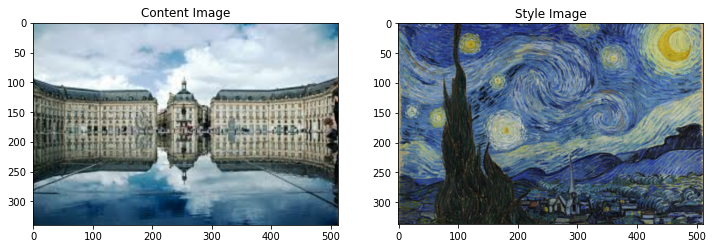

In [84]:
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1,2,1)
imshow(content_image, 'Content Image')

plt.subplot(1,2,2)
imshow(style_image, 'Style Image')

In [0]:
import tensorflow_hub as hub 
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')
stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]
bdx_van = tensor_to_image(stylized_image)

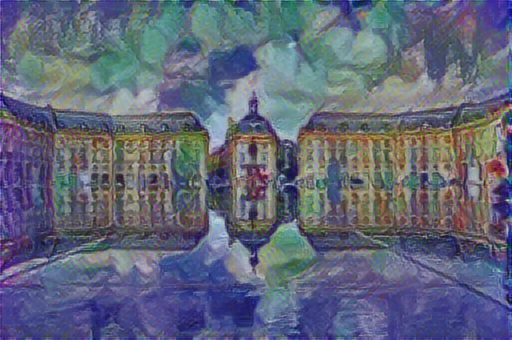

In [86]:
bdx_van

### **VGG19 Architecture**

In [87]:
x = tf.keras.applications.vgg19.preprocess_input(content_image*255)
x = tf.image.resize(x, (224, 224))
vgg = tf.keras.applications.VGG19(include_top=True, weights='imagenet')
prediction_probabilities = vgg(x)
prediction_probabilities.shape

TensorShape([1, 1000])

In [88]:
predicted_top_5 = tf.keras.applications.vgg19.decode_predictions(prediction_probabilities.numpy())[0]
[(class_name, prob) for (number, class_name, prob) in predicted_top_5]

[('castle', 0.6407154),
 ('palace', 0.20134988),
 ('monastery', 0.033797007),
 ('prison', 0.027502963),
 ('dam', 0.026119342)]

In [89]:
vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')

print()
for layer in vgg.layers: 
  print(layer.name)


input_10
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


In [0]:
content_layers = ['block5_conv2']

style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1', 
                'block4_conv1', 
                'block5_conv1']

num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

In [0]:
def vgg_layers(layer_names): 
  vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
  vgg.trainable = False

  outputs = [vgg.get_layer(name).output for name in layer_names]

  model = tf.keras.Model([vgg.input], outputs)
  return model

In [92]:
style_extractor = vgg_layers(style_layers)
style_outputs = style_extractor(style_image*255)

#Look at the statistics of each layer's output
for name, output in zip(style_layers, style_outputs):
  print(name)
  print("  shape: ", output.numpy().shape)
  print("  min: ", output.numpy().min())
  print("  max: ", output.numpy().max())
  print("  mean: ", output.numpy().mean())
  print()

block1_conv1
  shape:  (1, 338, 511, 64)
  min:  0.0
  max:  646.994
  mean:  21.99782

block2_conv1
  shape:  (1, 169, 255, 128)
  min:  0.0
  max:  2366.191
  mean:  131.89268

block3_conv1
  shape:  (1, 84, 127, 256)
  min:  0.0
  max:  5833.653
  mean:  126.80572

block4_conv1
  shape:  (1, 42, 63, 512)
  min:  0.0
  max:  14817.167
  mean:  476.9131

block5_conv1
  shape:  (1, 21, 31, 512)
  min:  0.0
  max:  3050.0518
  mean:  39.52149



In [0]:
def gram_matrix(input_tensor):
  result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
  input_shape = tf.shape(input_tensor)
  num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
  return result/(num_locations)

In [0]:
class StyleContentModel(tf.keras.models.Model):
  def __init__(self, style_layers, content_layers):
    super(StyleContentModel, self).__init__()
    self.vgg =  vgg_layers(style_layers + content_layers)
    self.style_layers = style_layers
    self.content_layers = content_layers
    self.num_style_layers = len(style_layers)
    self.vgg.trainable = False

  def call(self, inputs):
    "Expects float input in [0,1]"
    inputs = inputs*255.0
    preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
    outputs = self.vgg(preprocessed_input)
    style_outputs, content_outputs = (outputs[:self.num_style_layers], 
                                      outputs[self.num_style_layers:])

    style_outputs = [gram_matrix(style_output)
                     for style_output in style_outputs]

    content_dict = {content_name:value 
                    for content_name, value 
                    in zip(self.content_layers, content_outputs)}

    style_dict = {style_name:value
                  for style_name, value
                  in zip(self.style_layers, style_outputs)}
    
    return {'content':content_dict, 'style':style_dict}

In [95]:
extractor = StyleContentModel(style_layers, content_layers)

results = extractor(tf.constant(content_image))

style_results = results['style']

print('Styles:')
for name, output in sorted(results['style'].items()):
  print("  ", name)
  print("    shape: ", output.numpy().shape)
  print("    min: ", output.numpy().min())
  print("    max: ", output.numpy().max())
  print("    mean: ", output.numpy().mean())
  print()

print("Contents:")
for name, output in sorted(results['content'].items()):
  print("  ", name)
  print("    shape: ", output.numpy().shape)
  print("    min: ", output.numpy().min())
  print("    max: ", output.numpy().max())
  print("    mean: ", output.numpy().mean())

Styles:
   block1_conv1
    shape:  (1, 64, 64)
    min:  0.014103365
    max:  45053.977
    mean:  504.53613

   block2_conv1
    shape:  (1, 128, 128)
    min:  0.0
    max:  67327.54
    mean:  13506.375

   block3_conv1
    shape:  (1, 256, 256)
    min:  0.0
    max:  329465.47
    mean:  11110.622

   block4_conv1
    shape:  (1, 512, 512)
    min:  0.0
    max:  2261958.2
    mean:  164141.33

   block5_conv1
    shape:  (1, 512, 512)
    min:  0.0
    max:  74997.664
    mean:  1218.8091

Contents:
   block5_conv2
    shape:  (1, 21, 32, 512)
    min:  0.0
    max:  1137.5104
    mean:  13.471697


In [0]:
style_targets = extractor(style_image)['style']
content_targets = extractor(content_image)['content']

In [0]:
image = tf.Variable(content_image)

In [0]:
def clip_0_1(image):
  return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

In [0]:
opt = tf.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)

In [0]:
style_weight=1e-2
content_weight=1e4

In [0]:
def style_content_loss(outputs):
    style_outputs = outputs['style']
    content_outputs = outputs['content']
    style_loss = tf.add_n([tf.reduce_mean((style_outputs[name]-style_targets[name])**2) 
                           for name in style_outputs.keys()])
    style_loss *= style_weight / num_style_layers

    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name]-content_targets[name])**2) 
                             for name in content_outputs.keys()])
    content_loss *= content_weight / num_content_layers
    loss = style_loss + content_loss
    return loss

In [0]:
@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = extractor(image)
    loss = style_content_loss(outputs)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))

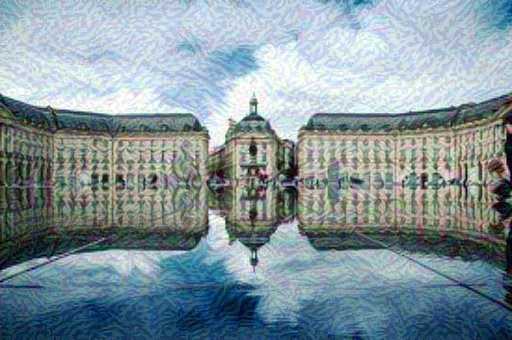

In [103]:
train_step(image)
train_step(image)
train_step(image)
tensor_to_image(image)

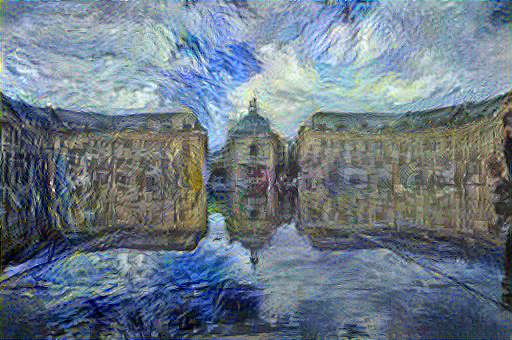

Train step: 1000
Total time: 77.4


In [104]:
import time
start = time.time()

epochs = 10
steps_per_epoch = 100

step = 0
for n in range(epochs):
  for m in range(steps_per_epoch):
    step += 1
    train_step(image)
    print(".", end='')
  display.clear_output(wait=True)
  display.display(tensor_to_image(image))
  print("Train step: {}".format(step))
  
end = time.time()
print("Total time: {:.1f}".format(end-start))

In [0]:
def high_pass_x_y(image):
  x_var = image[:,:,1:,:] - image[:,:,:-1,:]
  y_var = image[:,1:,:,:] - image[:,:-1,:,:]

  return x_var, y_var

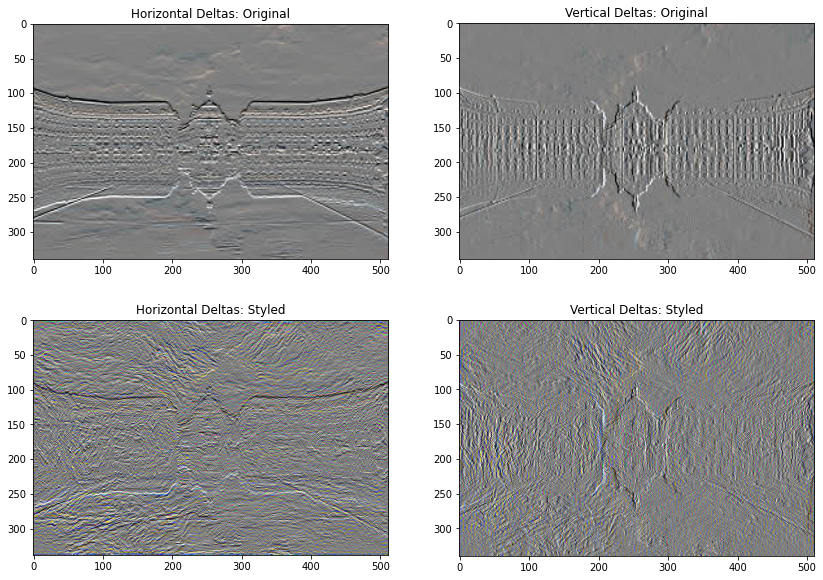

In [106]:
x_deltas, y_deltas = high_pass_x_y(content_image)

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
imshow(clip_0_1(2*y_deltas+0.5), "Horizontal Deltas: Original")

plt.subplot(2,2,2)
imshow(clip_0_1(2*x_deltas+0.5), "Vertical Deltas: Original")

x_deltas, y_deltas = high_pass_x_y(image)

plt.subplot(2,2,3)
imshow(clip_0_1(2*y_deltas+0.5), "Horizontal Deltas: Styled")

plt.subplot(2,2,4)
imshow(clip_0_1(2*x_deltas+0.5), "Vertical Deltas: Styled")

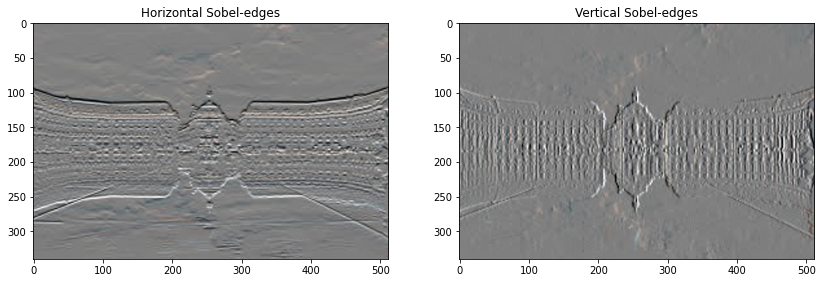

In [107]:
plt.figure(figsize=(14,10))

sobel = tf.image.sobel_edges(content_image)
plt.subplot(1,2,1)
imshow(clip_0_1(sobel[...,0]/4+0.5), "Horizontal Sobel-edges")
plt.subplot(1,2,2)
imshow(clip_0_1(sobel[...,1]/4+0.5), "Vertical Sobel-edges")

In [0]:
def total_variation_loss(image):
  x_deltas, y_deltas = high_pass_x_y(image)
  return tf.reduce_sum(tf.abs(x_deltas)) + tf.reduce_sum(tf.abs(y_deltas))

In [109]:
total_variation_loss(image).numpy()

79407.47

In [110]:
tf.image.total_variation(image).numpy()

array([79407.47], dtype=float32)

In [0]:
total_variation_weight=30

In [0]:
@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = extractor(image)
    loss = style_content_loss(outputs)
    loss += total_variation_weight*tf.image.total_variation(image)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))

In [0]:
image = tf.Variable(content_image)

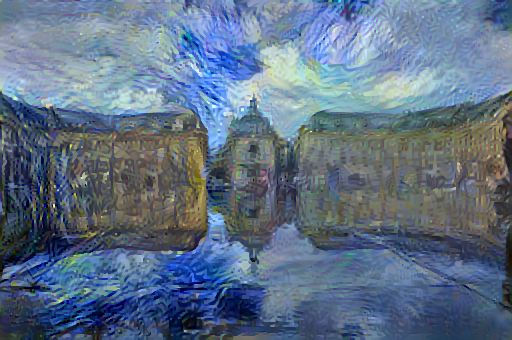

Train step: 1000
Total time: 78.1


In [114]:
import time
start = time.time()

epochs = 10
steps_per_epoch = 100

step = 0
for n in range(epochs):
  for m in range(steps_per_epoch):
    step += 1
    train_step(image)
    print(".", end='')
  display.clear_output(wait=True)
  display.display(tensor_to_image(image))
  print("Train step: {}".format(step))

end = time.time()
print("Total time: {:.1f}".format(end-start))